<font color="cornflowerblue" size="6px"><b>📉 Business Insights</b></font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# libraries

In [498]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import copy
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder 

# dataset(s)

In [348]:
from vega_datasets import data
cars = data.cars()
df=pd.read_csv("./datasets/cars.csv")

# data preprocessing

<font color="mediumslateblue" size="3px">The dataset has already been cleaned as shown <a href="https://bhavneet1492.github.io/Data-Cleaning/" target="_blank">here</a></font>

<font color="cornflowerblue" size="5px">Finding the threshold value for each colmn and storing it in an array</font>

<font color="grey" size="3px">(Threshold=difference b/w consecutive elements of a column) / (no. of columns - 1)</font>

In [231]:
threshold={}
for col in df.columns:
    diff=0
    for ele in range(len(df[col])-1):
        diff+=abs(df[col][ele+1]-df[col][ele])
    threshold.update({col: (diff/(len(df[col])-1))})  

In [232]:
#the average difference between feature elements for each feature is as follows:
threshold

{'Unnamed: 0': 1.0,
 'Make': 2.290155440414508,
 'Model': 9.58419689119171,
 'Variant': 76.96502590673575,
 'Ex-Showroom_Price': 832026.8199481865,
 'Displacement': 167.81402616377386,
 'Cylinders': 0.21857477464688777,
 'Valves_Per_Cylinder': 0.17250325196753133,
 'Fuel_Tank_Capacity': 6.313471502590674,
 'Fuel_Type': 0.9896373056994818,
 'Height': 30.699481865284973,
 'Mileage': 343.88874871310105,
 'Length': 60.72020725388601,
 'Width': 18.226683937823836,
 'Body_Type': 0.41450777202072536,
 'Doors': 0.17041659106335222,
 'Kerb_Weight': 69771.53476122308,
 'Gears': 0.5518134715025906,
 'Power': 7.242227979274611,
 'Speedometer': 0.4170984455958549,
 'Seating_Capacity': 0.275025233833524,
 'Seats_Material': 0.1645077720207254,
 'Type': 0.7085492227979274,
 'Wheelbase': 32.26242376403282,
 'Wheels_Size': 11.325129533678757,
 'Audiosystem': 1.38860103626943,
 'Basic_Warranty': 0.44041450777202074,
 'Bluetooth': 0.21502590673575128,
 'CD_/_MP3_/_DVD_Player': 0.22797927461139897,
 'Voice

# most polpular feature

In [26]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder',
       'Fuel_Tank_Capacity', 'Fuel_Type', 'Height', 'Mileage', 'Length',
       'Width', 'Body_Type', 'Doors', 'Kerb_Weight', 'Gears', 'Power',
       'Speedometer', 'Seating_Capacity', 'Seats_Material', 'Type',
       'Wheelbase', 'Wheels_Size', 'Audiosystem', 'Basic_Warranty',
       'Bluetooth', 'CD_/_MP3_/_DVD_Player', 'Voice_Recognition',
       'Walk_Away_Auto_Car_Lock', 'ABS_(Anti-lock_Braking_System)', 'Airbags',
       'Parking_Assistance', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006',
       '2005', '2004', '2003', '2002', '2001'],
      dtype='object')

In [27]:
print(df.columns.get_loc('Variant'),df.columns.get_loc('Parking_Assistance'),
      df.columns.get_loc('2020'),df.columns.get_loc('2001'))

3 33 34 53


<font color="grey" size="5px"><b>overall</b></font>

In [224]:
def bsf(feature):
    sales=[]
    for i in range(len(feature)):
        sale=0
        for j in range(34,54):
            sale+=df.iloc[:,j][i]
        sales.append([feature[i],sale])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    max_sold=sales[0][1]
    for i in range(len(sales)):
        if sales[i][1]!=max_sold:
            break
    feat_list=[sales[j][0] for j in range(i)]
    return feat_list

bsf(df.Power) #this is the power that encounterd the maximum overall sales

[34.0]

In [225]:
bsf(df.Bluetooth)

[0.0]

In [469]:
bar_data

Feature      Sales
0           Honda  5203373.0
1          Toyota  4912911.0
2        Mahindra  3712916.0
3            Tata  3181171.0
4         Hyundai  2402613.0
5   Maruti Suzuki  2116679.0
6         Premier  1054802.0
7          Datsun   950824.0
8            Jeep   884069.0
9            Audi   608325.0
10     Volkswagen   601399.0
11          Bajaj   563331.0
12         Jaguar   546344.0
13            Bmw   491647.0
14           Fiat   396350.0
15           Ford   328632.0
16            Kia   311265.0
17        Porsche   301656.0
18        Bentley   280436.0
19          Skoda   277103.0
20        Bugatti   266380.0
21           Icml   256315.0
22             Mg   239602.0
23        Renault   179515.0
24          Force   177700.0
25         Nissan   131574.0
26           Mini    77953.0
27          Volvo    70941.0
28   Aston Martin    47999.0
29       Maserati    36184.0
30             Dc    32253.0
31    Lamborghini    24258.0
32          Lexus    10955.0
33        Ferrari     7229.0
34     Land Rover     6731.0
35          Isuzu     3259.0
36            NaN        0.0

<AxesSubplot:xlabel='Feature'>

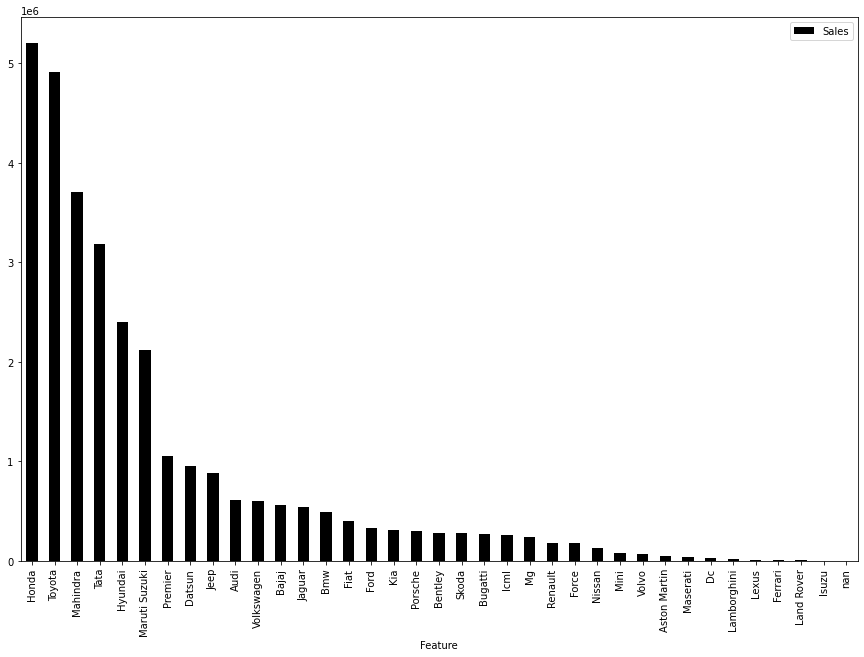

In [474]:
def bsf_bar(feature):
    sales=[]
    for i in range(len(feature)):
        sale=0
        for j in range(34,54):
            sale+=df.iloc[:,j][i]
        sales.append([feature[i],sale])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    max_sold=sales[0][1]
    for i in range(len(sales)):
        if sales[i][1]!=max_sold:
            break
    return sales

bar_data=pd.DataFrame(bsf_bar(df_cat.Make))
bar_data.columns=["Feature","Sales"]
bar_data.plot.bar(x='Feature', y='Sales',color='black',figsize=(15, 10))

<font color="mediumslateblue" size="3px">The above dataset has been categorically encoded.
For some features, this may not work, for eg: Speedometer-digital/analogous. The function will return an encoded integer for this, which has no meaning. So, a non categorically encoded dataset is preferred to use this function, as demonstrated below</font>

In [52]:
df.head()

Unnamed: 0  Make  Model  Variant  Ex-Showroom_Price  Displacement  \
0           0  32.0   91.0    592.0           292667.0         624.0   
1           1  32.0   91.0    570.0           236447.0         624.0   
2           2  32.0   91.0    249.0           296661.0         624.0   
3           3  32.0   91.0    598.0           334768.0         624.0   
4           4  32.0   91.0    577.0           272223.0         624.0   

   Cylinders  Valves_Per_Cylinder  Fuel_Tank_Capacity  Fuel_Type  ...   2010  \
0        2.0                  2.0                24.0        5.0  ...    0.0   
1        2.0                  2.0                24.0        5.0  ...  915.0   
2        2.0                  2.0                15.0        0.0  ...    0.0   
3        2.0                  2.0                24.0        5.0  ...    0.0   
4        2.0                  2.0                24.0        5.0  ...   97.0   

    2009  2008  2007  2006  2005  2004  2003  2002  2001  
0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1  766.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4  172.0  74.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 54 columns]

In [53]:
df_cat=pd.read_csv("./datasets/cars_cat.csv")
df_cat.head()

Unnamed: 0  Make      Model  Variant  Ex-Showroom_Price  Displacement  \
0           0  Tata  Nano Genx       Xt           292667.0         624.0   
1           1  Tata  Nano Genx       Xe           236447.0         624.0   
2           2  Tata  Nano Genx  Emax Xm           296661.0         624.0   
3           3  Tata  Nano Genx      Xta           334768.0         624.0   
4           4  Tata  Nano Genx       Xm           272223.0         624.0   

   Cylinders  Valves_Per_Cylinder  Fuel_Tank_Capacity Fuel_Type  ...   2010  \
0        2.0                  2.0                24.0    Petrol  ...    0.0   
1        2.0                  2.0                24.0    Petrol  ...  915.0   
2        2.0                  2.0                15.0       CNG  ...    0.0   
3        2.0                  2.0                24.0    Petrol  ...    0.0   
4        2.0                  2.0                24.0    Petrol  ...   97.0   

    2009  2008  2007 2006  2005  2004 2003  2002 2001  
0    0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  
1  766.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  
2    0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  
3    0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  
4  172.0  74.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0  

[5 rows x 54 columns]

In [170]:
bsf(df_cat.Bluetooth)

['Yes']

<font color="grey" size="5px"><b>by each year</b></font>

In [226]:
def bsf_y(feature,year):
    sales=[]
    feat_list=[]
    for i in range(len(feature)):
        sale=df[str(year)][i]
        sales.append([feature[i],sale])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    max_sold=sales[0][1]
    for i in range(len(sales)):
        if sales[i][1]!=max_sold:
            break
    feat_list=[sales[j][0] for j in range(i)]
    return feat_list

In [227]:
bsf_y(df.Width,2002)

[1694.0]

<font color="grey" size="5px"><b>during the selected period</b></font>

In [228]:
def bsf_r(feature,end,start):
    sales=[]
    start=df.columns.get_loc(str(start))
    end=df.columns.get_loc(str(end))
    for i in range(len(feature)):
        sale=0
        for j in range(start,end+1):
            sale+=df.iloc[:,j][i]
        sales.append([feature[i],sale])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    max_sold=sales[0][1]
    for i in range(len(sales)):
        if sales[i][1]!=max_sold:
            break
    feat_list=[sales[j][0] for j in range(i)]
    return feat_list

In [229]:
bsf_r(df.Displacement,2018,2020)

[1248.0]

# Ranking features

### overall

In [245]:
def rank(feature):
    sales=[]
    for i in range(len(feature)):
        sale=0
        for j in range(34,54):
            sale+=df.iloc[:,j][i]
        sales.append([feature[i],sale])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    rank=1
    max=sales[0][1]
    for i in sales:
        if i[1]>=max:i[1]=rank
        else:
            rank+=1
            max=i[1]
            i[1]=rank
    return pd.DataFrame(sales, columns =['Feature', 'Rank'])

rank(df_cat.Make) 

Feature  Rank
0           Honda     1
1          Toyota     2
2        Mahindra     3
3            Tata     4
4         Hyundai     5
5   Maruti Suzuki     6
6         Premier     7
7          Datsun     8
8            Jeep     9
9            Audi    10
10     Volkswagen    11
11          Bajaj    12
12         Jaguar    13
13            Bmw    14
14           Fiat    15
15           Ford    16
16            Kia    17
17        Porsche    18
18        Bentley    19
19          Skoda    20
20        Bugatti    21
21           Icml    22
22             Mg    23
23        Renault    24
24          Force    25
25         Nissan    26
26           Mini    27
27          Volvo    28
28   Aston Martin    29
29       Maserati    30
30             Dc    31
31    Lamborghini    32
32          Lexus    33
33        Ferrari    34
34     Land Rover    35
35          Isuzu    36
36            NaN    37

<font color="grey" size="5px"><b>overall top 5</b></font>

In [248]:
rank(df_cat.Model).head(5)

Feature  Rank
0           Jazz     1
1  Innova Crysta     2
2          Nexon     3
3  Corolla Altis     4
4            Rio     5

<font color="grey" size="5px"><b>by each year</b></font>

In [255]:
def rank_y(feature,year):
    sales=[]
    feat_list=[]
    for i in range(len(feature)):
        sale=df[str(year)][i]
        sales.append([feature[i],sale])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    rank=1
    max=sales[0][1]
    for i in sales:
        if i[1]>=max:i[1]=rank
        else:
            rank+=1
            max=i[1]
            i[1]=rank
    return pd.DataFrame(sales, columns =['Feature', 'Rank'])

rank_y(df_cat.Model,2020).head(5)

Feature  Rank
0  Innova Crysta     1
1           Jazz     2
2         Xuv500     3
3          Swift     4
4          Nexon     5

<font color="grey" size="5px"><b>during the selected period</b></font>

In [254]:
def rank_r(feature,end,start):
    sales=[]
    start=df.columns.get_loc(str(start))
    end=df.columns.get_loc(str(end))
    for i in range(len(feature)):
        sale=0
        for j in range(start,end+1):
            sale+=df.iloc[:,j][i]
        sales.append([feature[i],sale])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    rank=1
    max=sales[0][1]
    for i in sales:
        if i[1]>=max:i[1]=rank
        else:
            rank+=1
            max=i[1]
            i[1]=rank
    return pd.DataFrame(sales, columns =['Feature', 'Rank'])

rank_r(df_cat.Make,2010,2015).head(5)

Feature  Rank
0     Honda     1
1    Toyota     2
2  Mahindra     3
3      Tata     4
4   Hyundai     5

# most profitable car type (multiply sales by price)

<font color="grey" size="5px"><b>overall</b></font>

In [262]:
def profit_rank(feature):
    sales=[]
    for i in range(len(feature)):
        sale=0
        for j in range(34,54):
            sale+=df.iloc[:,j][i]
        sales.append([feature[i],sale*df['Ex-Showroom_Price'][i]])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    rank=1
    max=sales[0][1]
    for i in sales:
        if i[1]>=max:i.append(rank)
        else:
            rank+=1
            max=i[1]
            i.append(rank)
    return pd.DataFrame(sales, columns =['Feature', 'Profit','Rank'])

profit_rank(df_cat.Make) 

Feature        Profit  Rank
0         Bugatti  5.620094e+13     1
1         Bentley  9.739451e+12     2
2          Toyota  8.329069e+12     3
3         Porsche  6.471492e+12     4
4           Honda  6.404056e+12     5
5             Bmw  5.286393e+12     6
6        Mahindra  4.437785e+12     7
7            Audi  3.882941e+12     8
8          Jaguar  3.081262e+12     9
9            Tata  3.047286e+12    10
10        Hyundai  2.233188e+12    11
11   Aston Martin  1.941872e+12    12
12           Jeep  1.924436e+12    13
13  Maruti Suzuki  1.529859e+12    14
14     Volkswagen  1.138578e+12    15
15            Kia  9.117120e+11    16
16    Lamborghini  7.277400e+11    17
17        Premier  7.225270e+11    18
18           Ford  7.028287e+11    19
19          Skoda  6.114167e+11    20
20             Mg  5.611262e+11    21
21         Datsun  5.574389e+11    22
22       Maserati  5.432042e+11    23
23           Fiat  3.514562e+11    24
24          Volvo  3.308634e+11    25
25        Ferrari  3.071138e+11    26
26           Mini  2.389298e+11    27
27          Lexus  2.382208e+11    28
28          Force  2.066277e+11    29
29           Icml  1.825085e+11    30
30          Bajaj  1.565362e+11    31
31        Renault  1.428647e+11    32
32             Dc  1.098991e+11    33
33         Nissan  7.722648e+10    34
34     Land Rover  4.098200e+10    35
35          Isuzu  9.546198e+09    36
36            NaN  0.000000e+00    37

<font color="grey" size="5px"><b>by each year</b></font>

In [268]:
def profit_rank_y(feature,year):
    sales=[]
    feat_list=[]
    for i in range(len(feature)):
        sale=df[str(year)][i]
        sales.append([feature[i],sale*df['Ex-Showroom_Price'][i]])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    rank=1
    max=sales[0][1]
    for i in sales:
        if i[1]>=max:i.append(rank)
        else:
            rank+=1
            max=i[1]
            i.append(rank)
    return pd.DataFrame(sales, columns =['Feature','Profit', 'Rank'])

profit_rank_y(df_cat.Model,2019)

Feature        Profit  Rank
0                             Chiron  4.775598e+12     1
1                     Continental Gt  1.101386e+12     2
2                           Panamera  5.159608e+11     3
3                           Bentayga  4.040665e+11     4
4              Mercedes-Benz Maybach  2.781883e+11     5
..                               ...           ...   ...
139  Mercedes-Benz S-Class Cabriolet  0.000000e+00   124
140               Rolls-Royce Wraith  0.000000e+00   124
141             Rolls-Royce Cullinan  0.000000e+00   124
142                            Gypsy  0.000000e+00   124
143                            Linea  0.000000e+00   124

[144 rows x 3 columns]

<font color="grey" size="5px"><b>during selected period</b></font>

In [269]:
def profit_rank_r(feature,end,start):
    sales=[]
    start=df.columns.get_loc(str(start))
    end=df.columns.get_loc(str(end))
    for i in range(len(feature)):
        sale=0
        for j in range(start,end+1):
            sale+=df.iloc[:,j][i]
        sales.append([feature[i],sale*df['Ex-Showroom_Price'][i]])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    sales=sorted(sales,key=lambda x:x[1],reverse=True)
    rank=1
    max=sales[0][1]
    for i in sales:
        if i[1]>=max:i.append(rank)
        else:
            rank+=1
            max=i[1]
            i.append(rank)
    return pd.DataFrame(sales, columns =['Feature','Profit', 'Rank'])

profit_rank_r(df_cat.Make,2010,2015)

Feature        Profit  Rank
0         Bugatti  1.202607e+13     1
1          Toyota  3.234877e+12     2
2         Porsche  3.058995e+12     3
3         Bentley  2.955769e+12     4
4           Honda  2.494348e+12     5
5             Bmw  1.722056e+12     6
6        Mahindra  1.653499e+12     7
7          Jaguar  1.529180e+12     8
8            Audi  1.266108e+12     9
9    Aston Martin  1.236351e+12    10
10           Tata  1.059404e+12    11
11        Hyundai  8.596661e+11    12
12           Jeep  6.947118e+11    13
13  Maruti Suzuki  5.244475e+11    14
14    Lamborghini  4.467300e+11    15
15     Volkswagen  3.927455e+11    16
16            Kia  3.756441e+11    17
17        Premier  2.785772e+11    18
18         Datsun  2.284228e+11    19
19           Ford  2.234015e+11    20
20             Mg  1.749872e+11    21
21           Fiat  1.568928e+11    22
22          Volvo  1.347898e+11    23
23       Maserati  1.292668e+11    24
24          Skoda  1.092235e+11    25
25          Force  9.612837e+10    26
26           Mini  6.375158e+10    27
27          Bajaj  5.804470e+10    28
28           Icml  4.372898e+10    29
29          Lexus  4.316627e+10    30
30        Renault  3.891099e+10    31
31         Nissan  2.134358e+10    32
32             Dc  9.383999e+09    33
33     Land Rover  1.345286e+09    34
34          Isuzu  0.000000e+00    35
35            NaN  0.000000e+00    35
36        Ferrari  0.000000e+00    35

# all models line chart/timeline

<font color="grey" size="5px"><b>based on sales</b></font>

In [349]:
def sales(feature,year):
    sales=[]
    feat_list=[]
    for i in range(len(feature)):
        sale=df[str(year)][i]
        sales.append([feature[i],sale])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    return sales

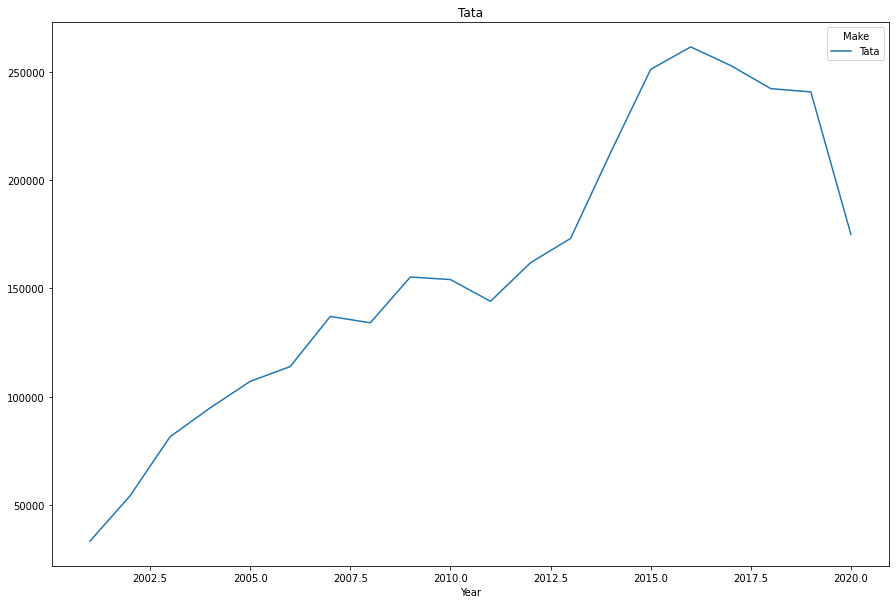

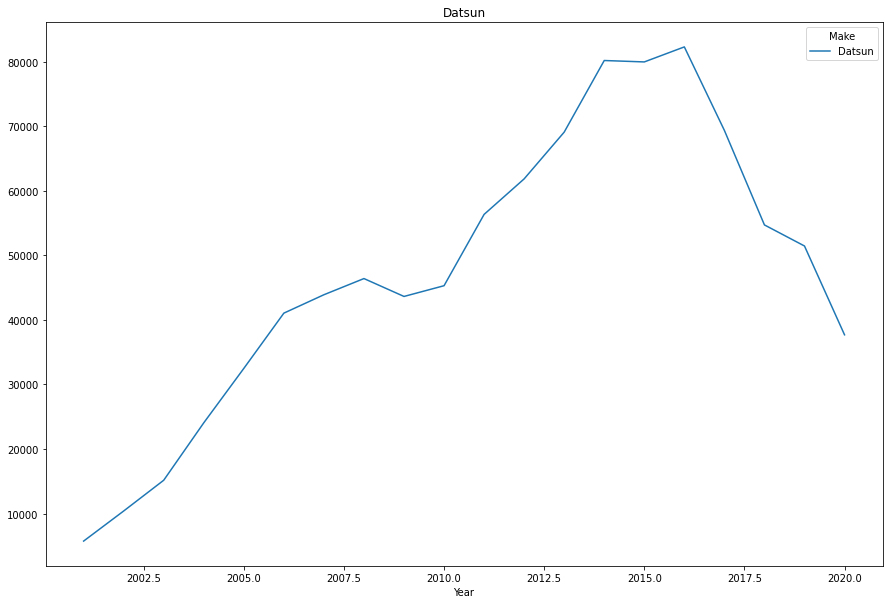

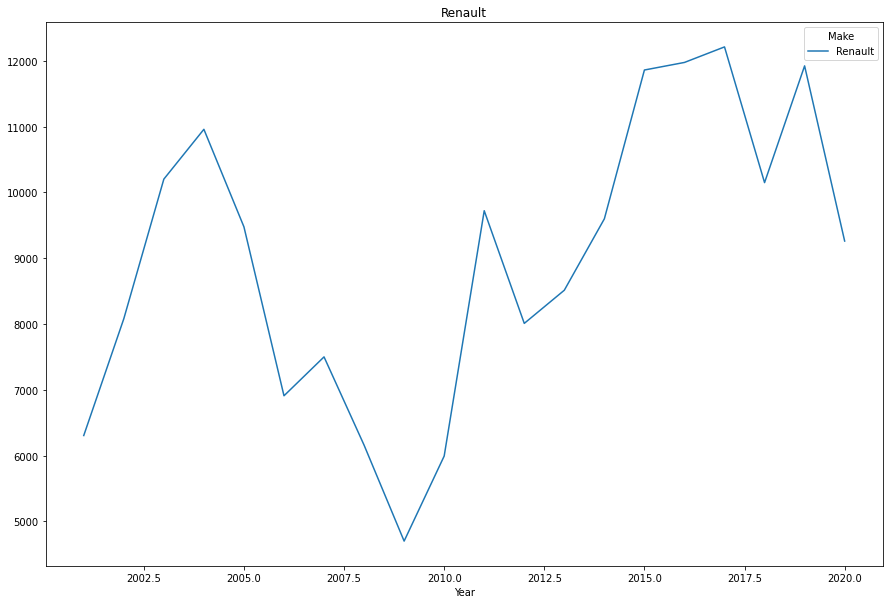

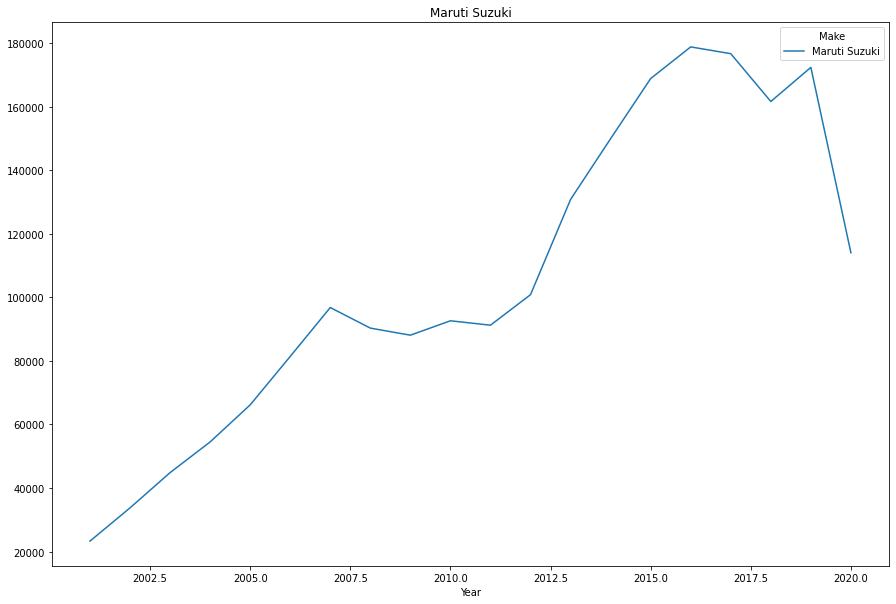

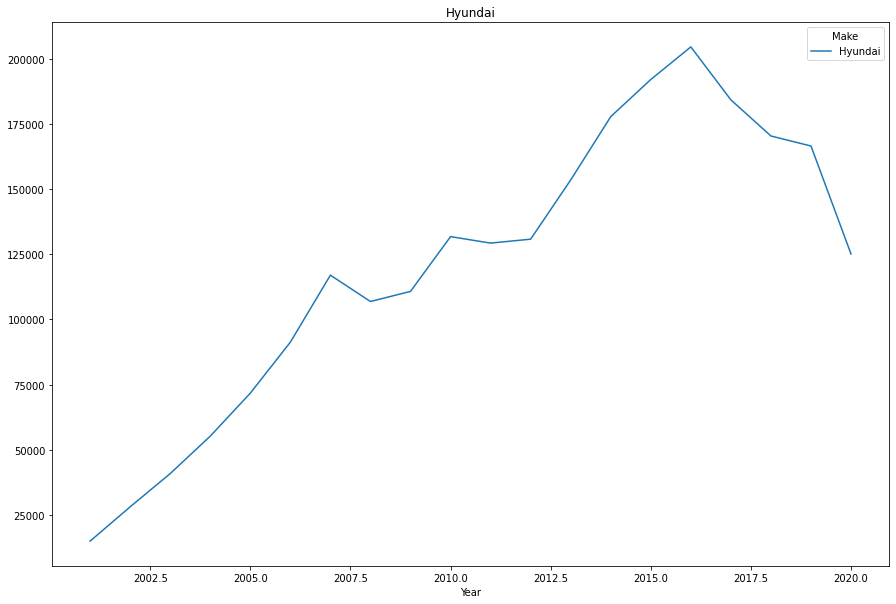

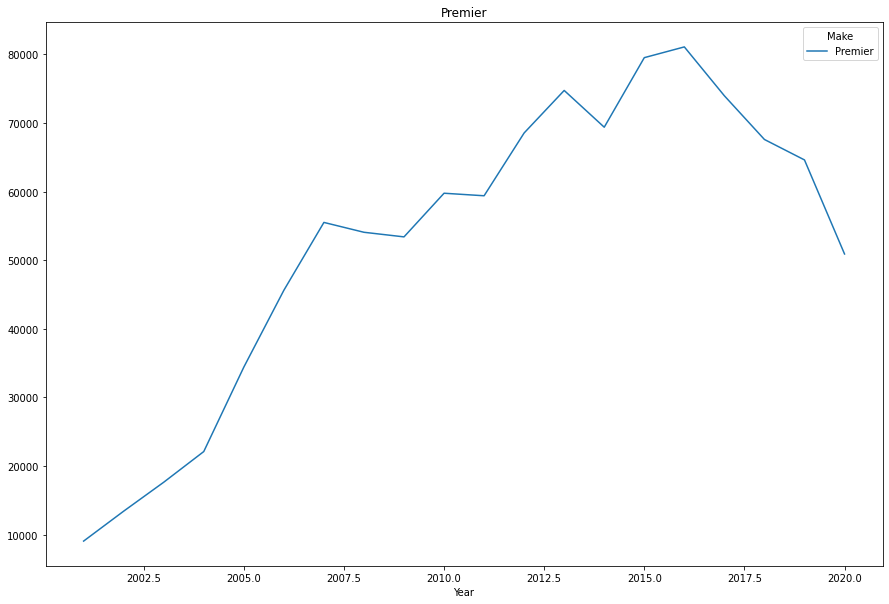

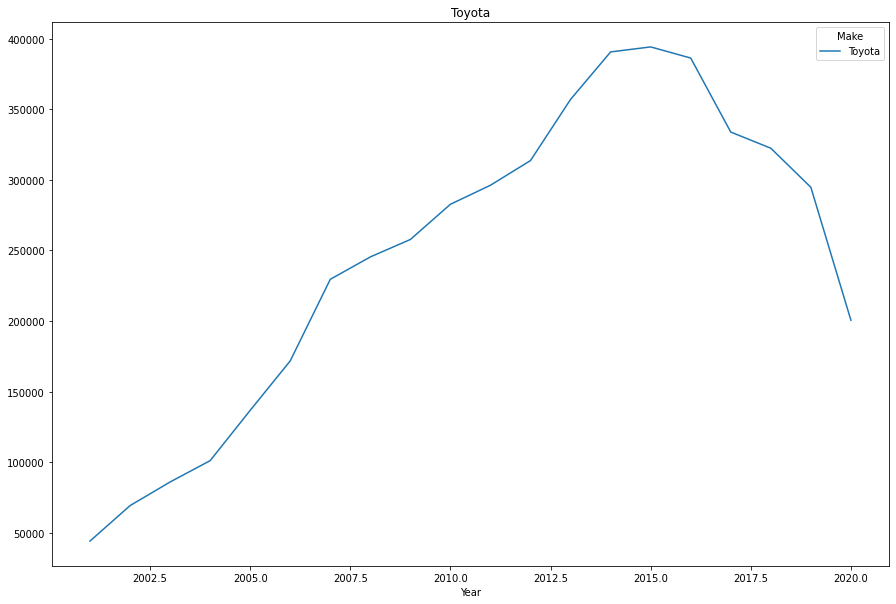

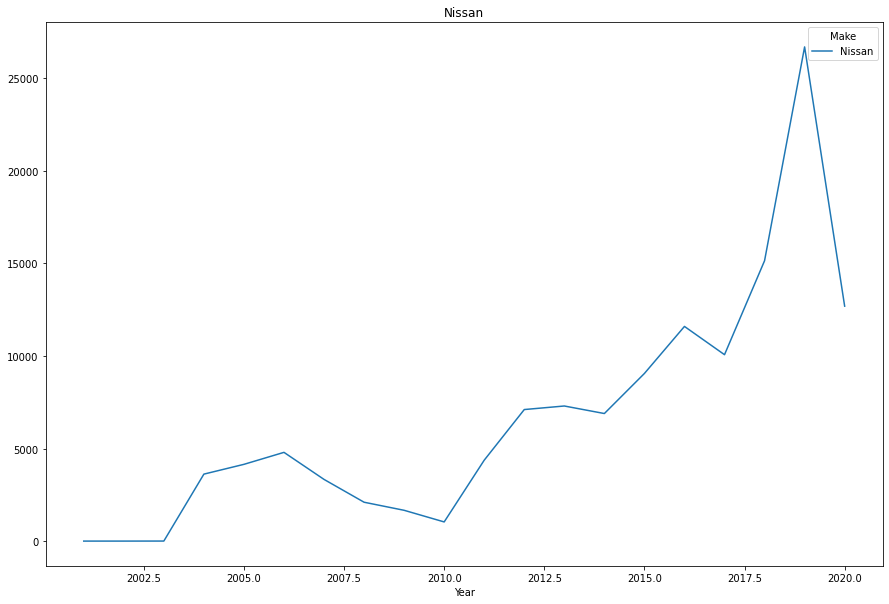

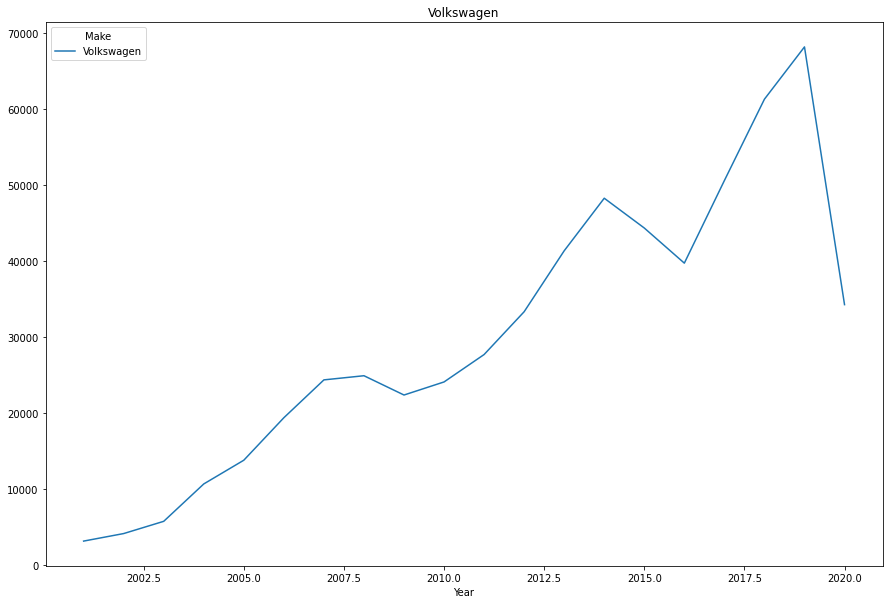

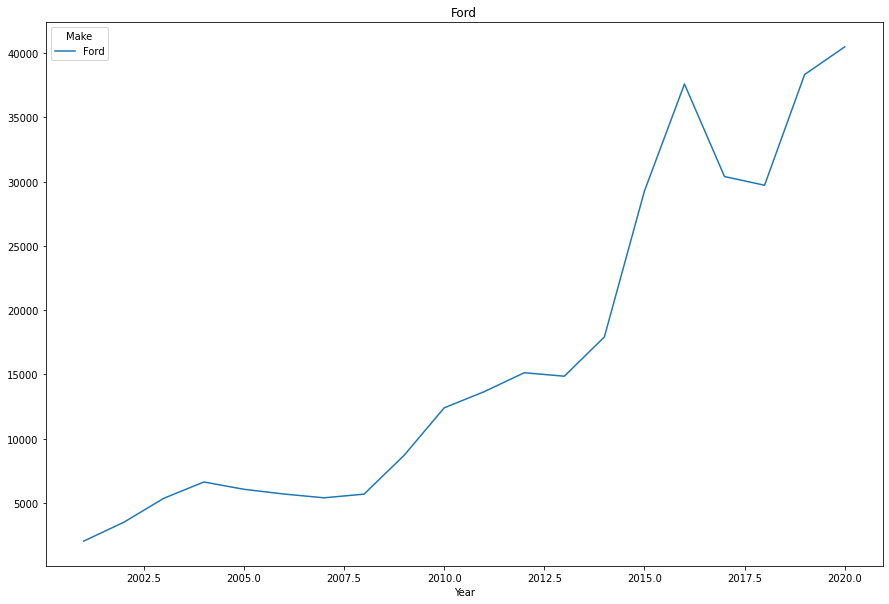

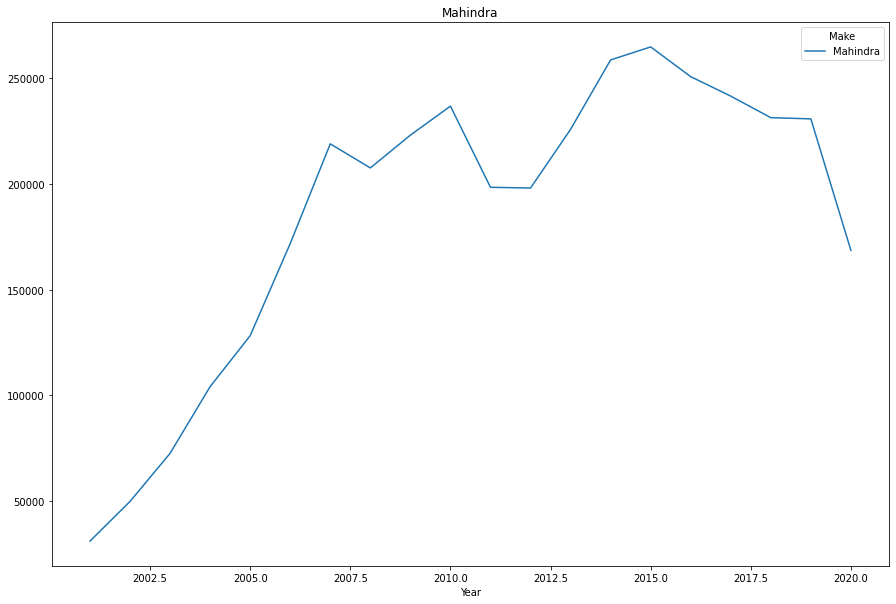

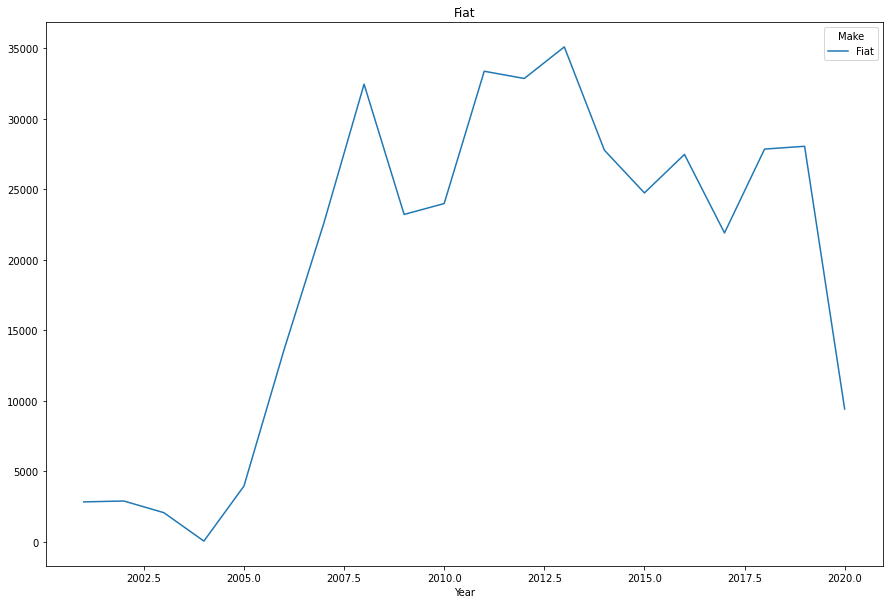

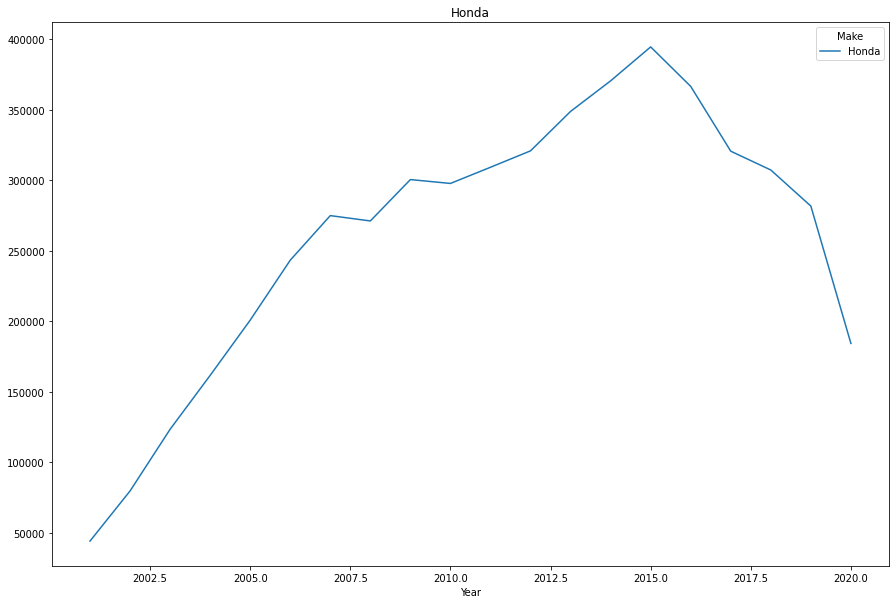

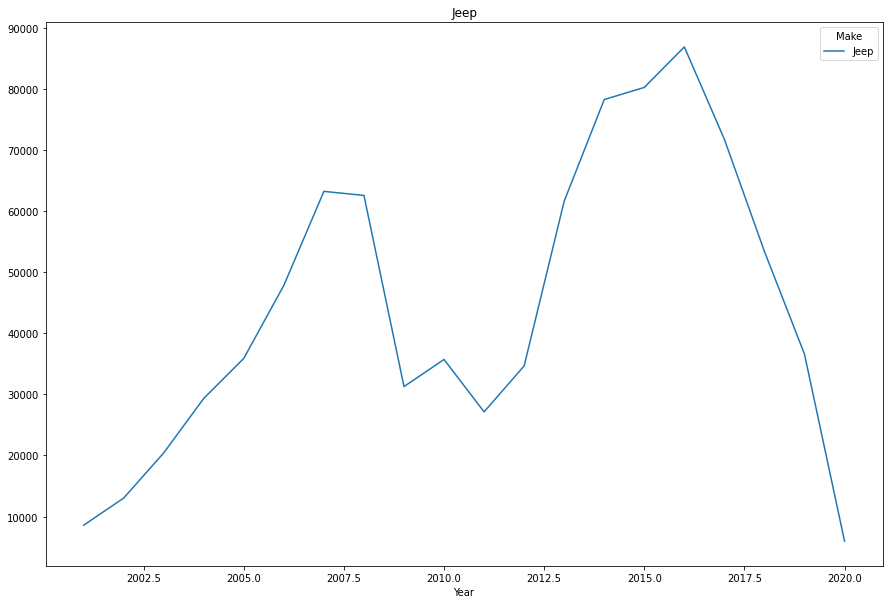

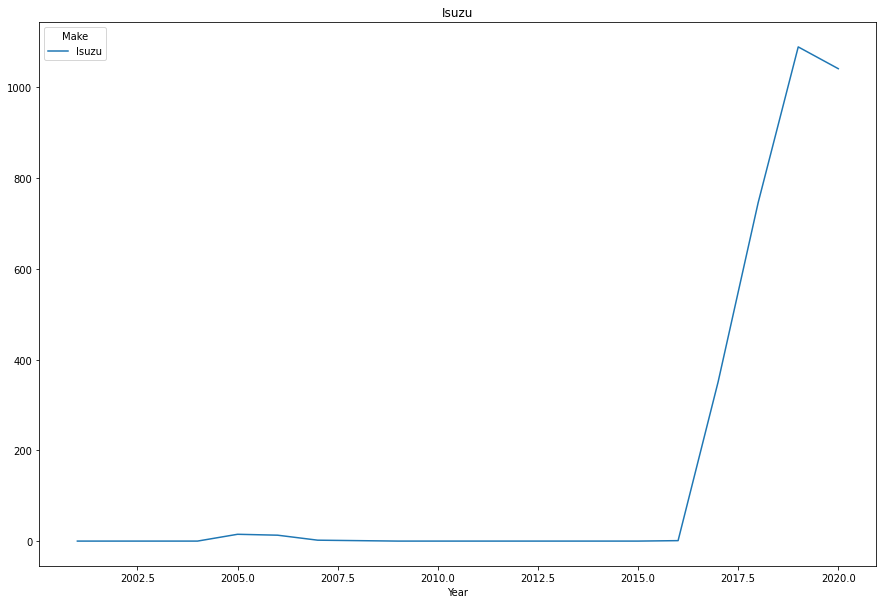

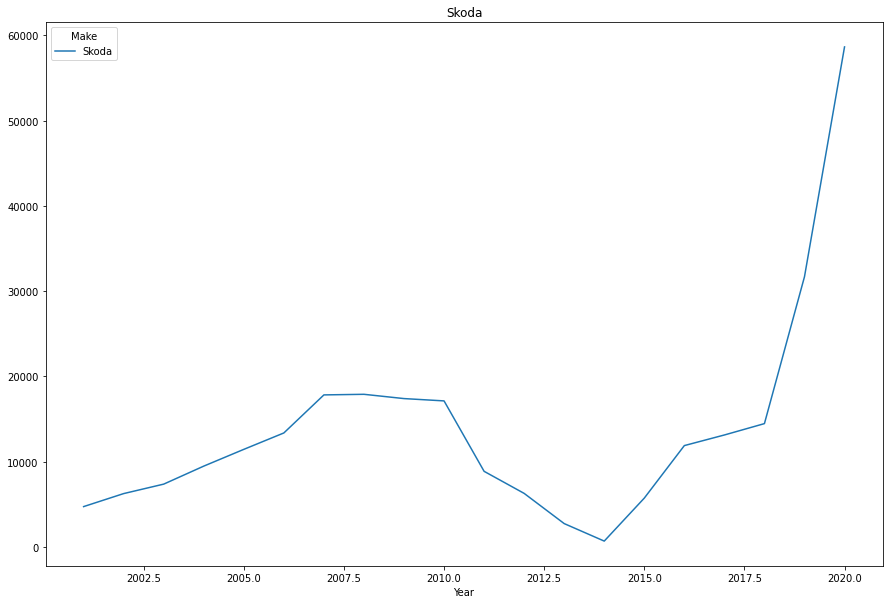

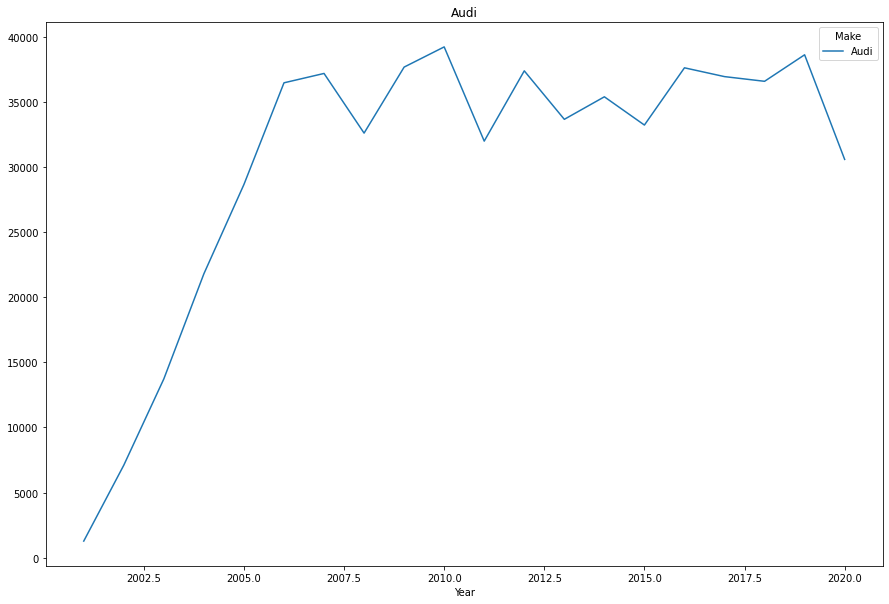

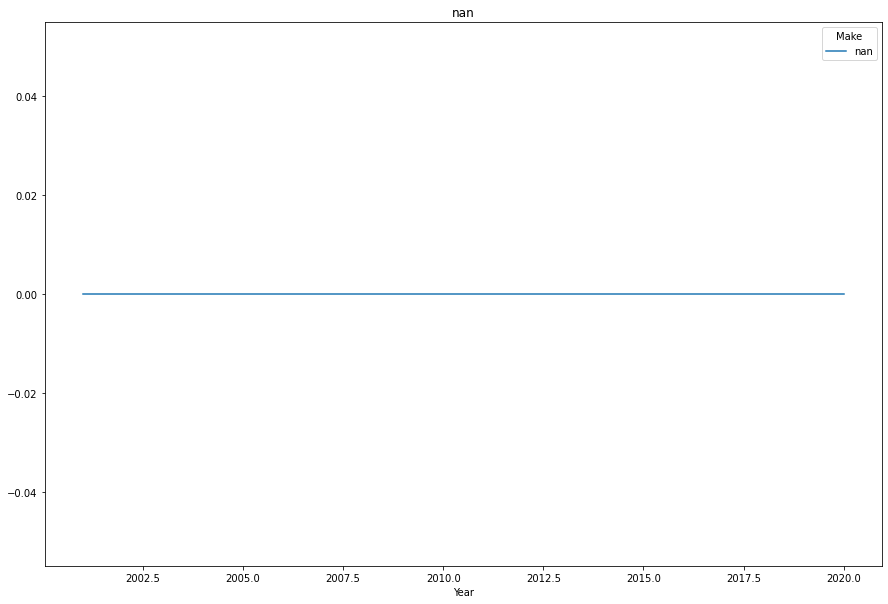

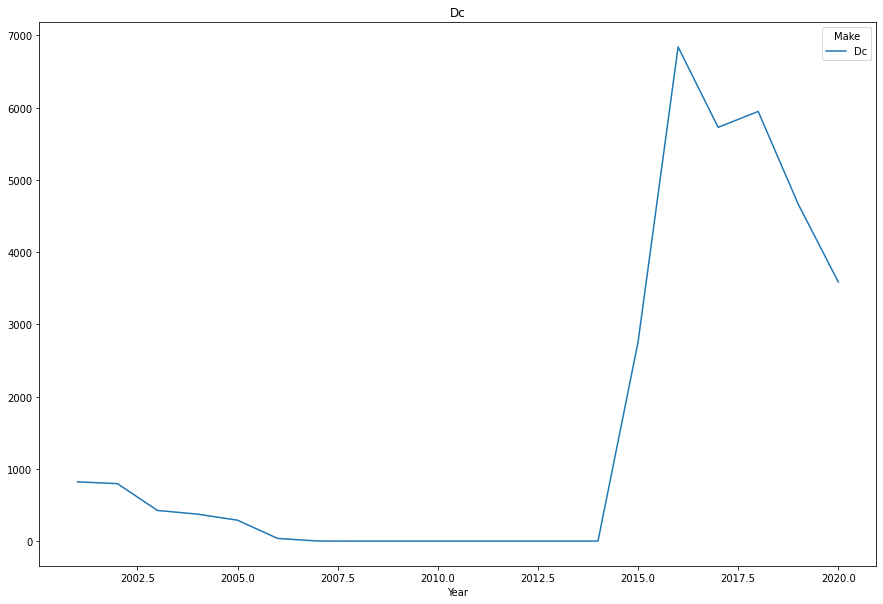

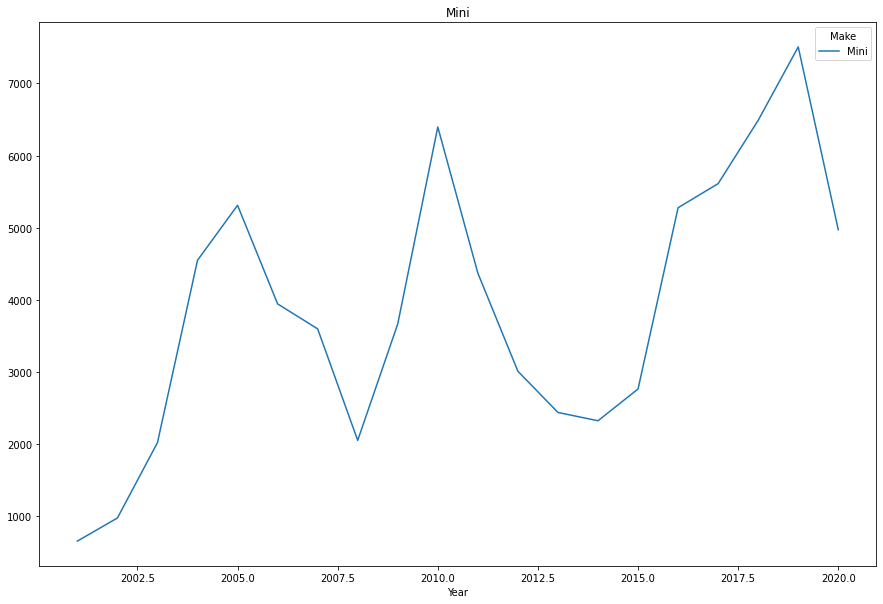

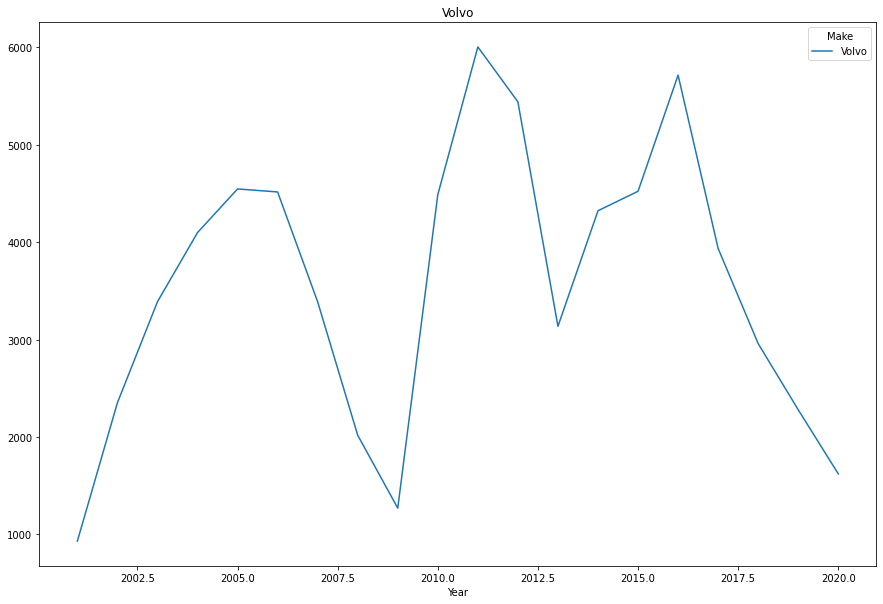

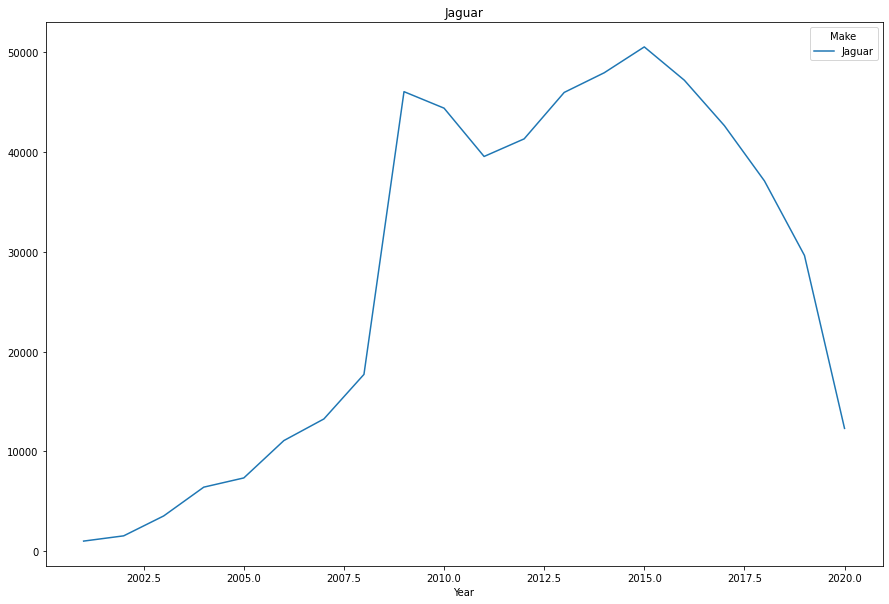

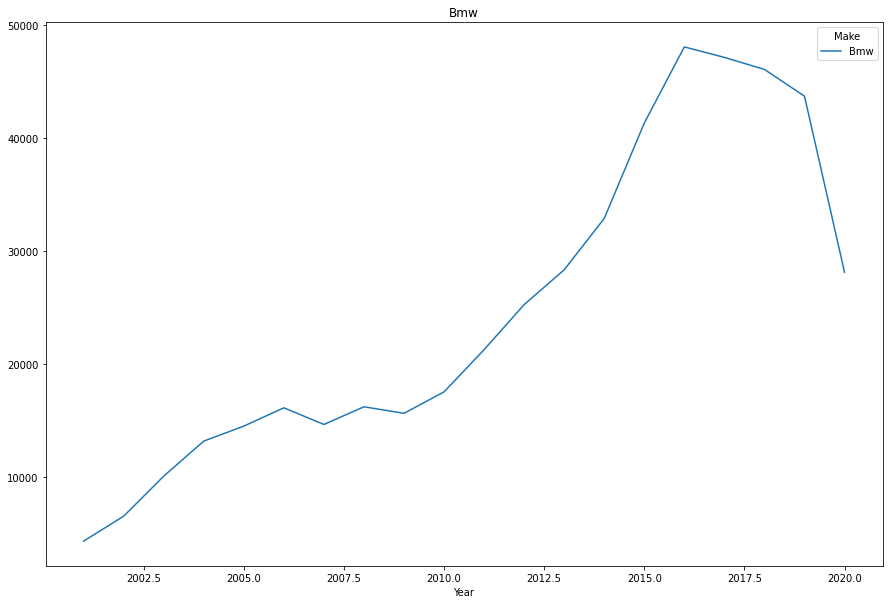

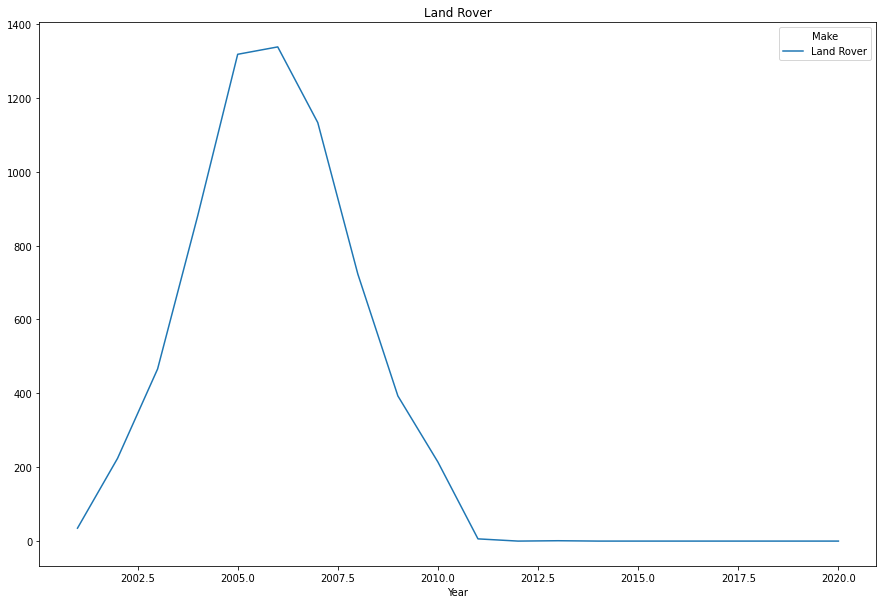

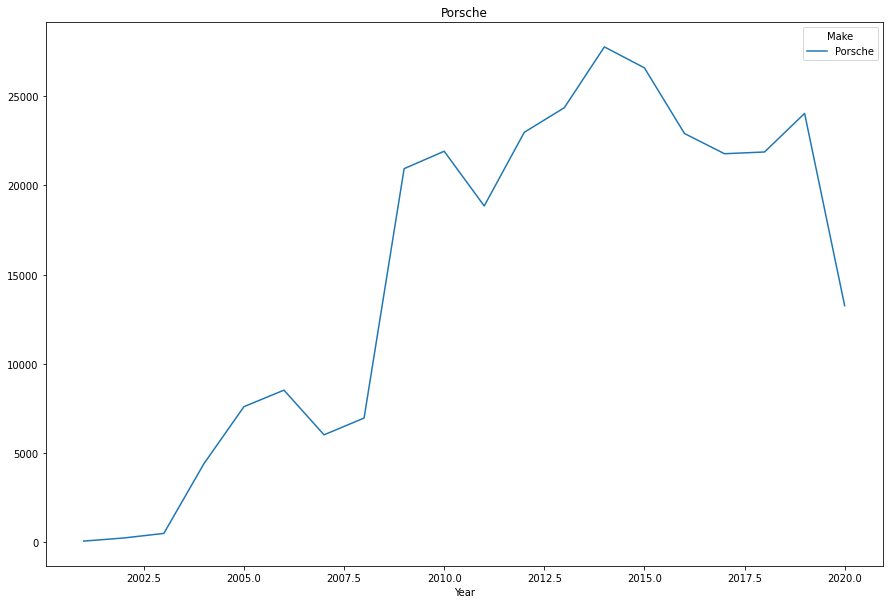

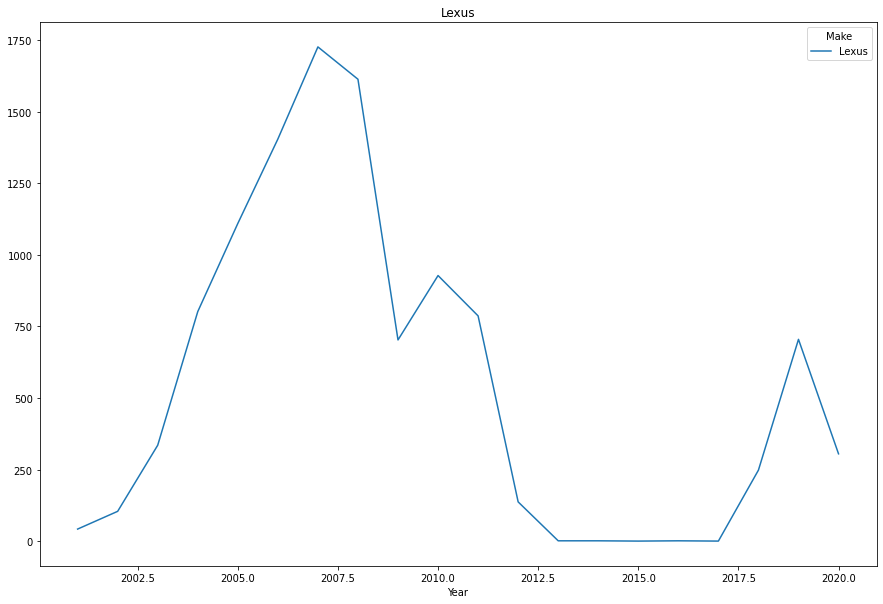

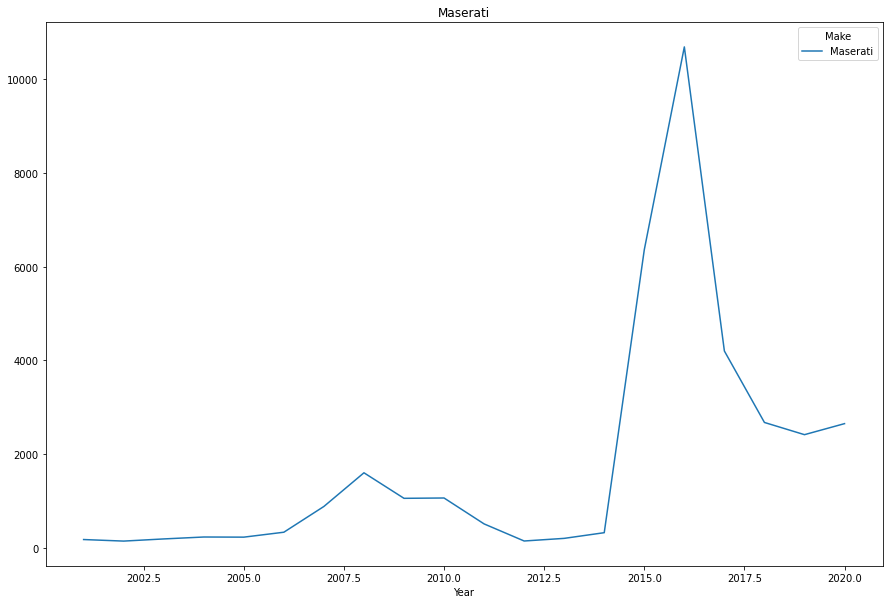

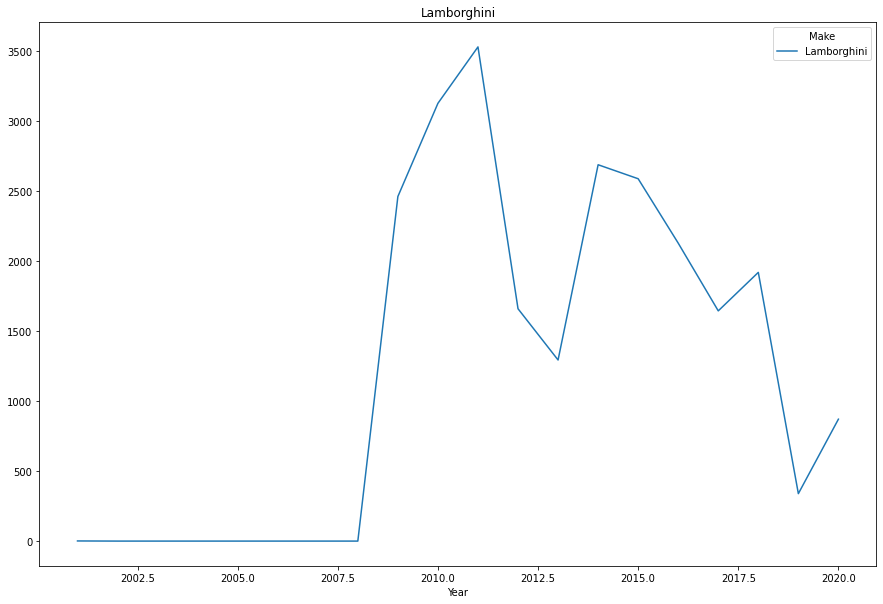

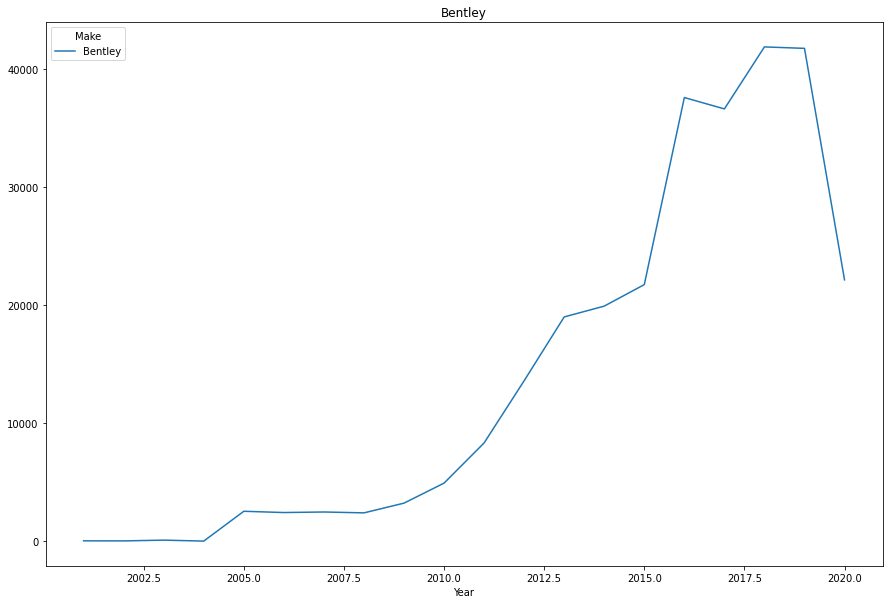

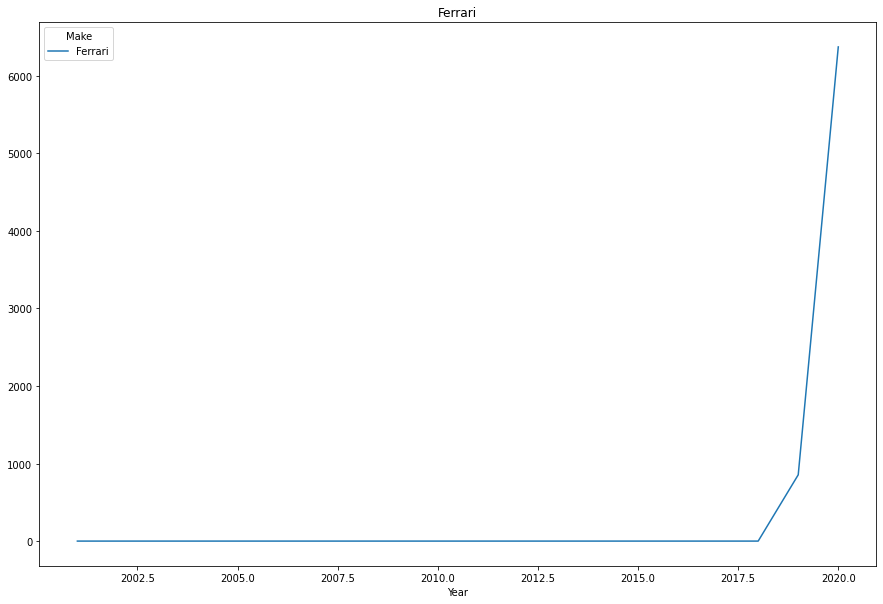

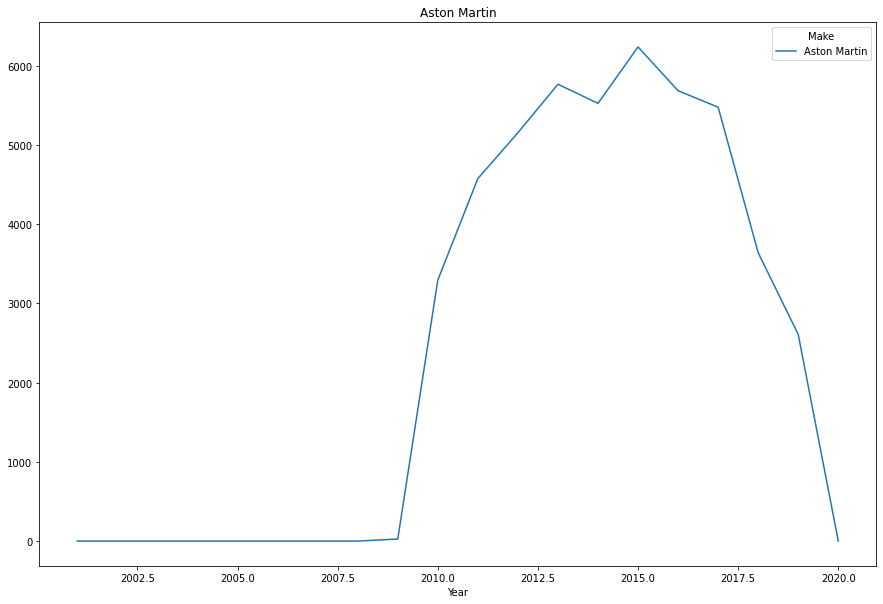

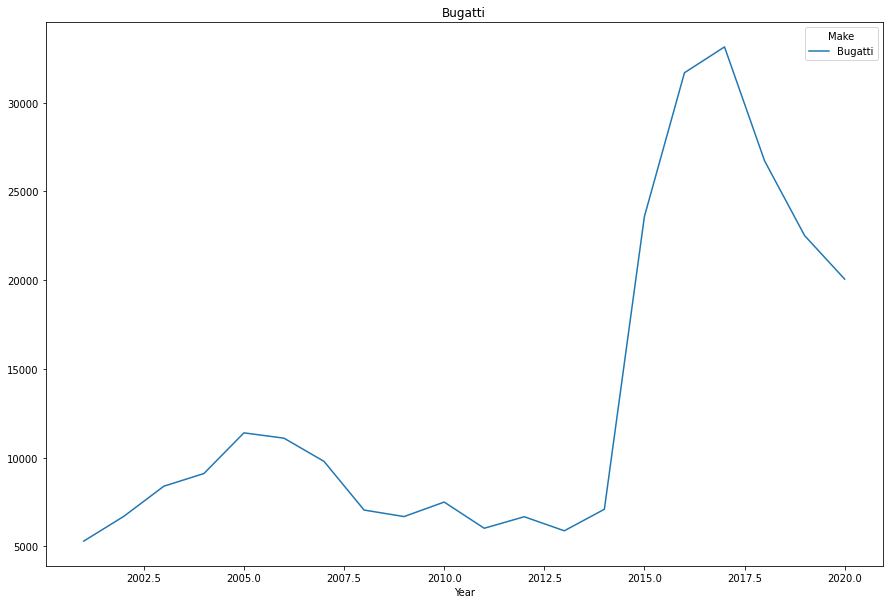

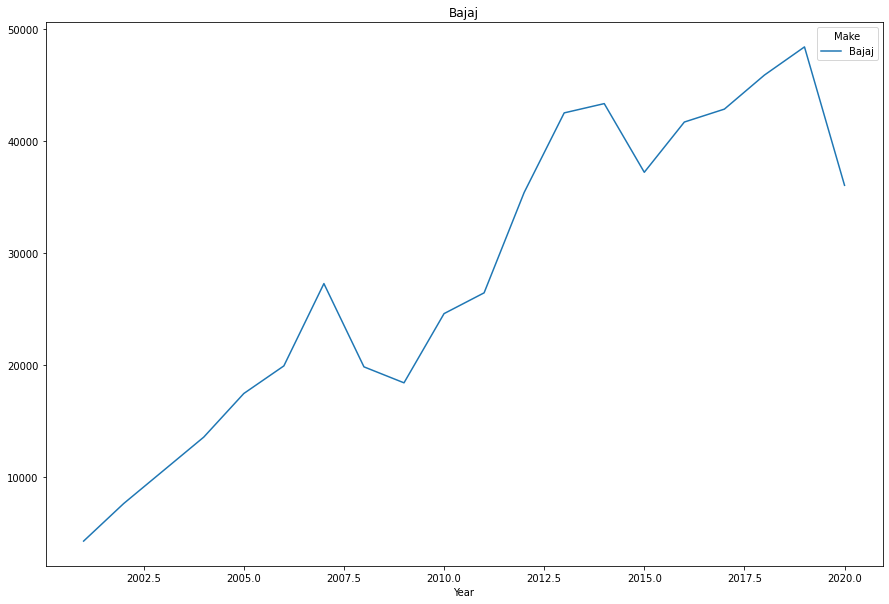

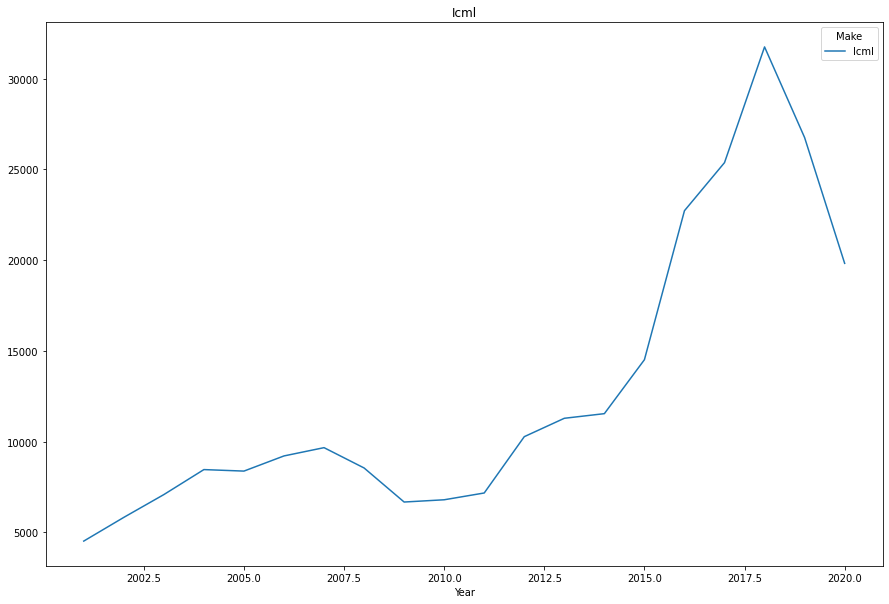

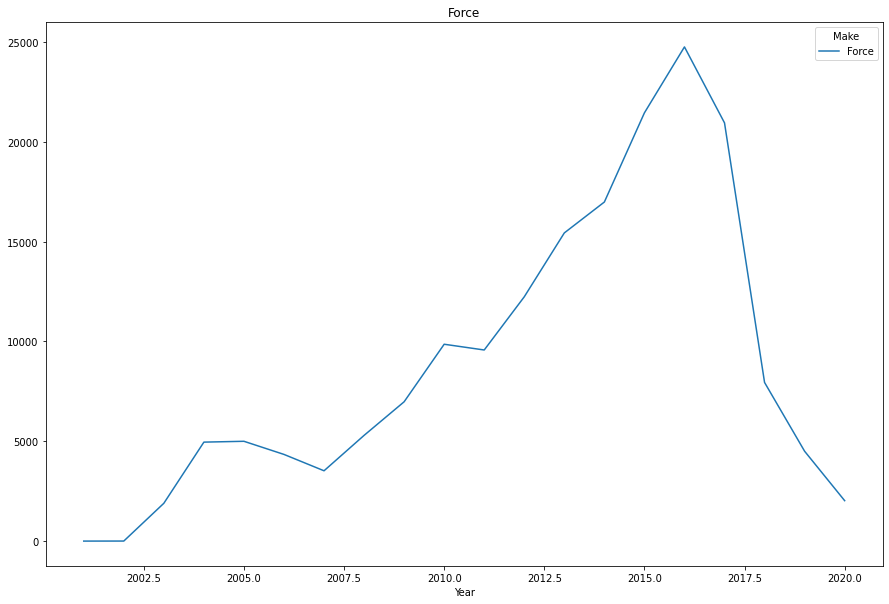

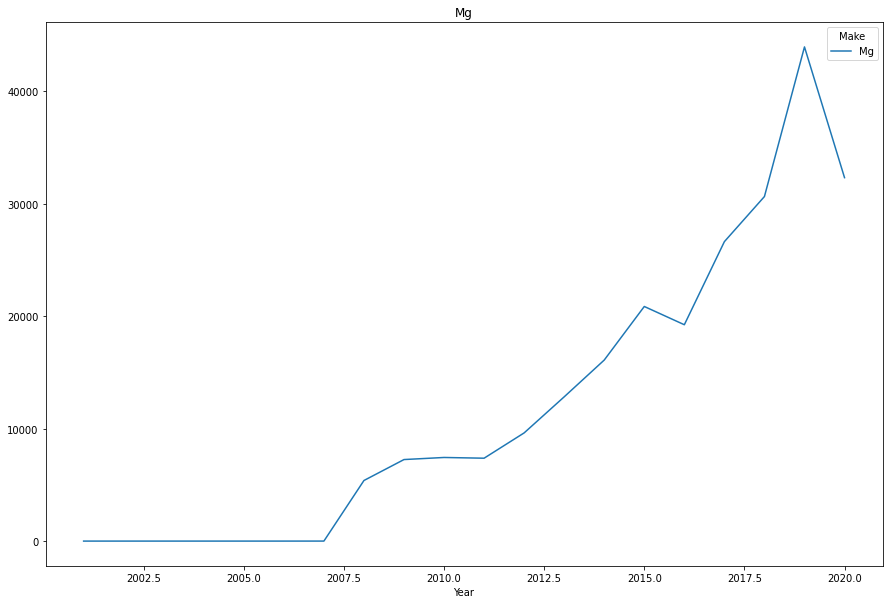

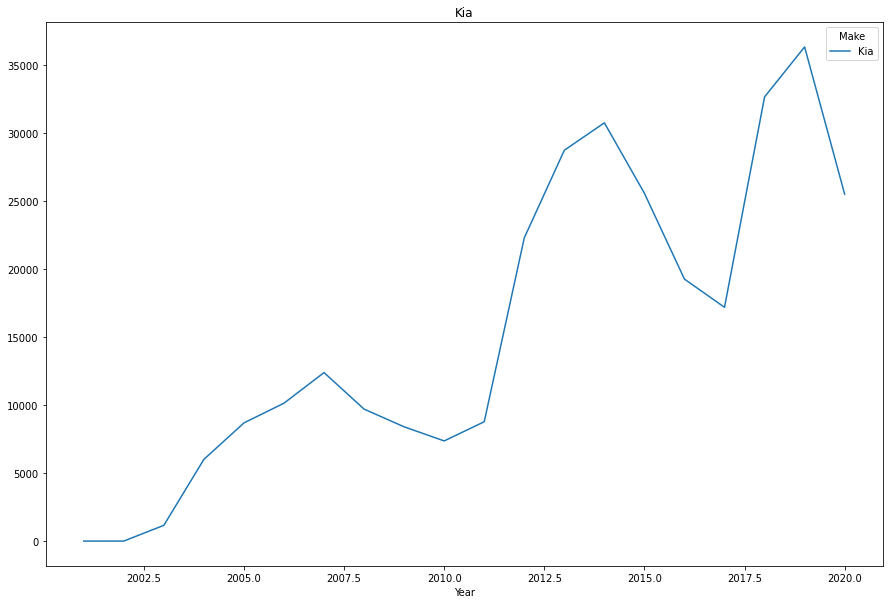

In [418]:
sales_list=[sales(df_cat.Make,i) for i in range(2001,2021)]
year=2001
for i in sales_list:    
    for j in i:
        j.append(year)
    year+=1
sales_list=np.array(sales_list).reshape(20,37,3)
sales_list= np.transpose(sales_list, (1,0,2))
# sales_list=sales_list.reshape(740,3)
for i in sales_list:
    dataset=[]
    dataset=pd.DataFrame(i)
    dataset.columns=['Make','Sales','Year']
    dataset.Year = dataset.Year.astype('int64')
    dataset.Sales = dataset.Sales.astype('float')
    dataset.groupby(['Year','Make']).sum().unstack().plot(kind='line',y='Sales',figsize=(15, 10),title=dataset.Make[0])

<AxesSubplot:xlabel='Year'>

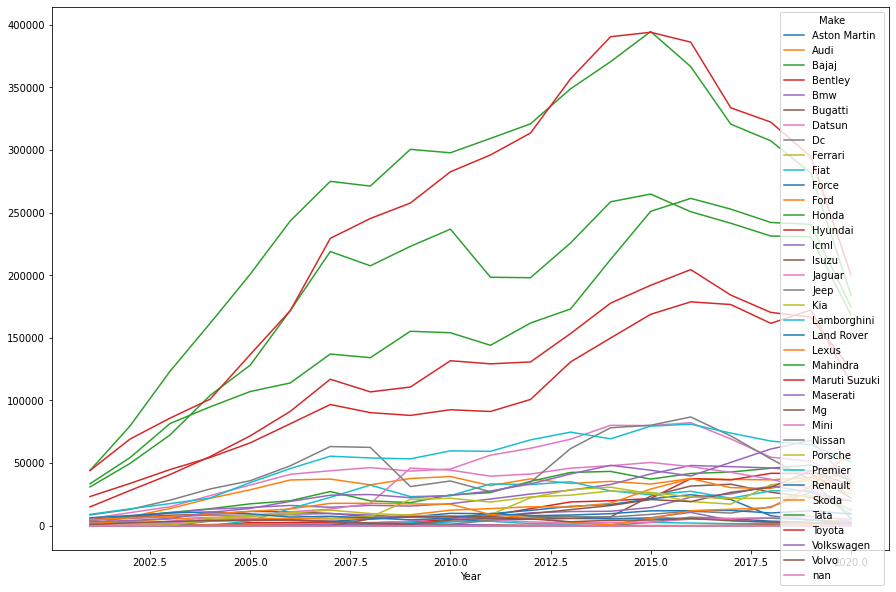

In [403]:
sales_list=sales_list.reshape(740,3)
data=pd.DataFrame(sales_list)
data.columns=['Make','Sales','Year']
data.Year = data.Year.astype('int64')
data.Sales = data.Sales.astype('float')
data.groupby(['Year','Make']).sum().unstack().plot(kind='line',y='Sales',figsize=(15, 10))

### Cumulative line chart

<AxesSubplot:xlabel='Year'>

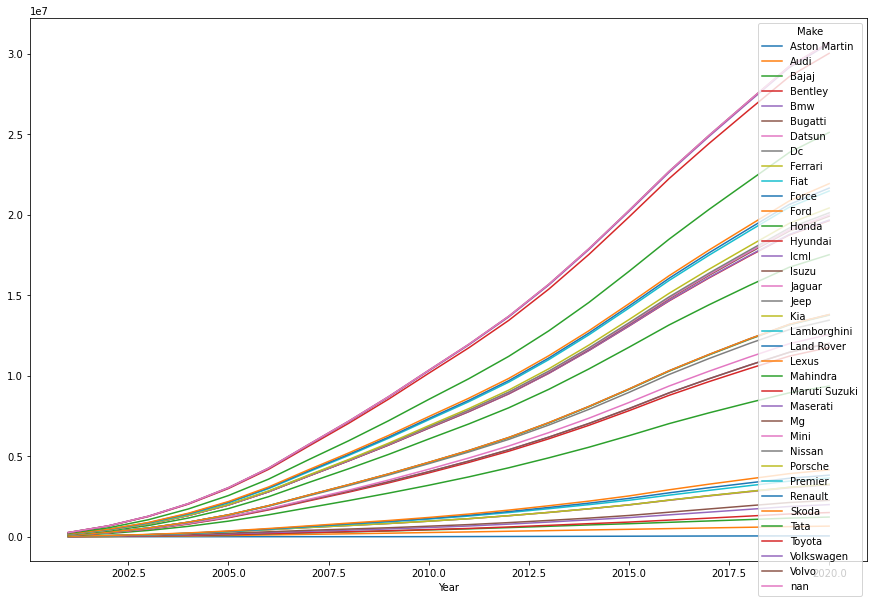

In [407]:
data.groupby(['Year','Make']).sum().groupby(level=[1]).cumsum().unstack().plot(kind='line',y='Sales', stacked = True,figsize=(15, 10))

In [416]:
import pandas_bokeh
pandas_bokeh.output_notebook()
data.plot_bokeh.line(x="Year",y="Sales")

Loading BokehJS ...

Figure(id='1192', ...)

<font color="grey" size="5px"><b>based on profit generated</b></font>

In [419]:
def profit(feature,year):
    sales=[]
    feat_list=[]
    for i in range(len(feature)):
        sale=df[str(year)][i]
        sales.append([feature[i],sale*df['Ex-Showroom_Price'][i]])
    a=sales
    b=[]
    for i in a:
        if [i[0],0] not in b:b.append([i[0],0])
    for i in a:
        for j in b:
            if i[0]==j[0]:j[1]+=i[1]
    sales=b
    return sales

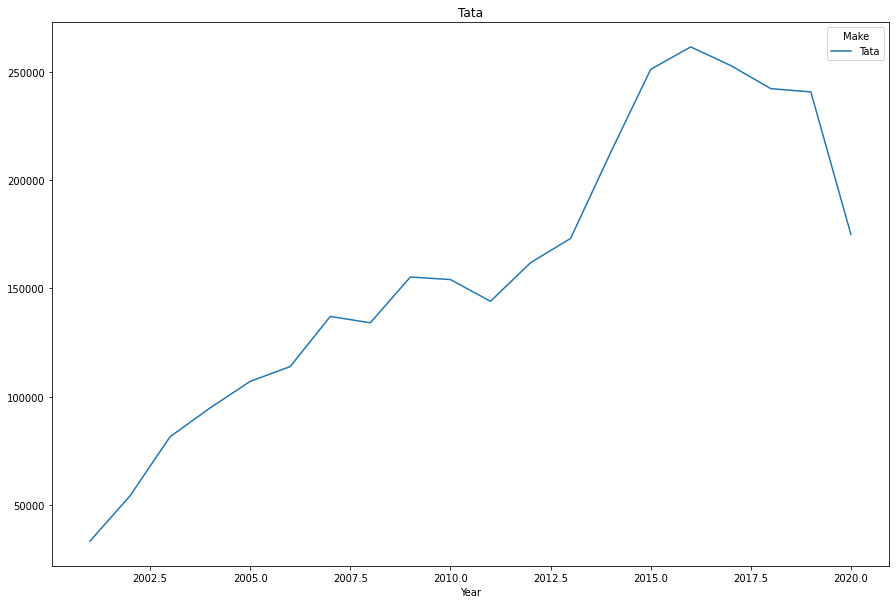

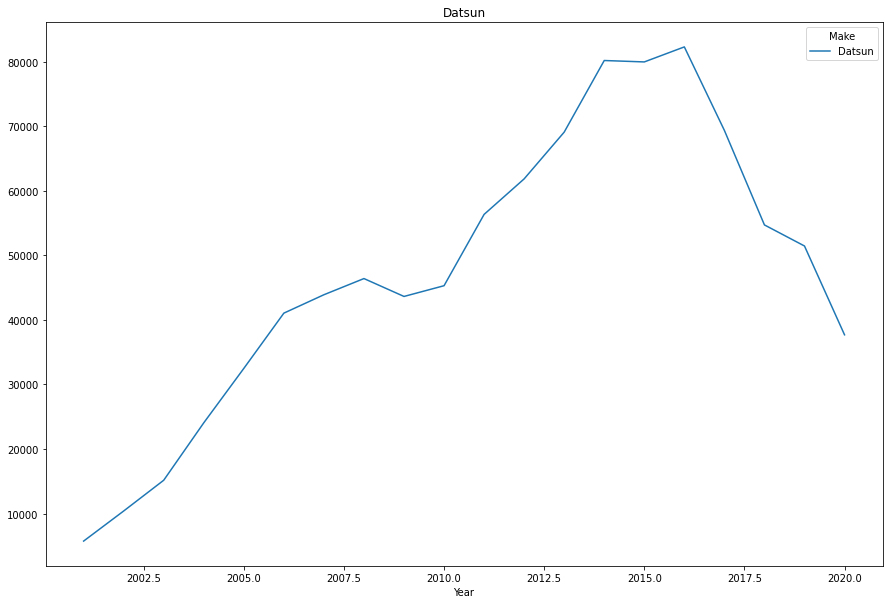

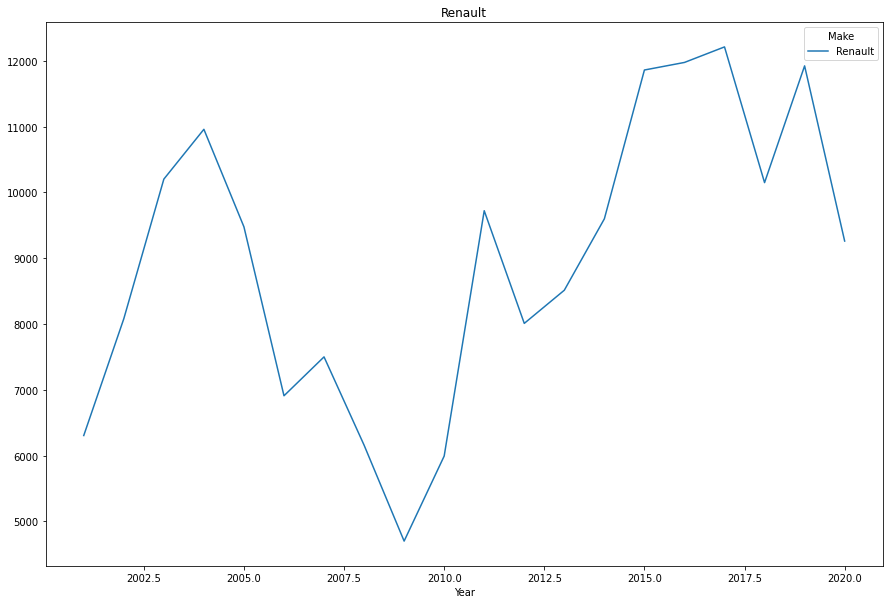

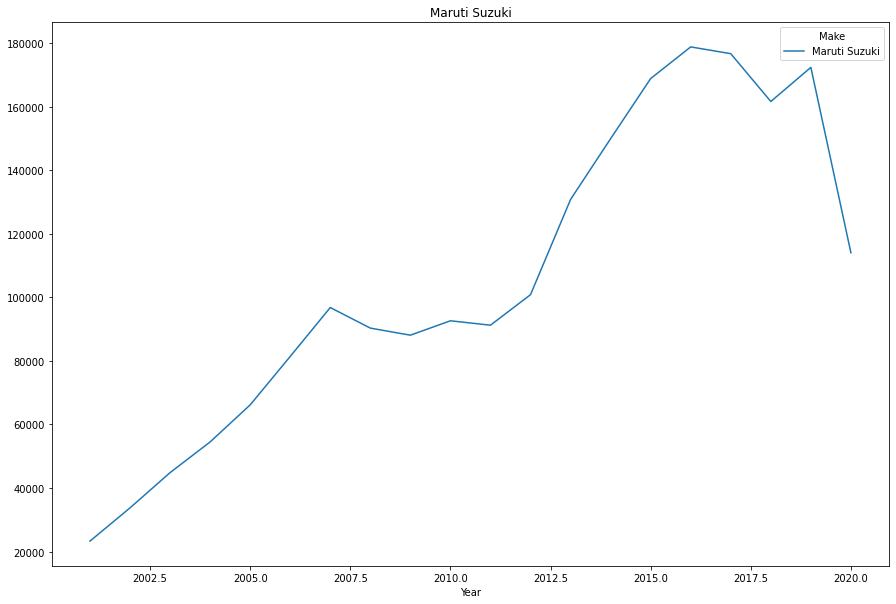

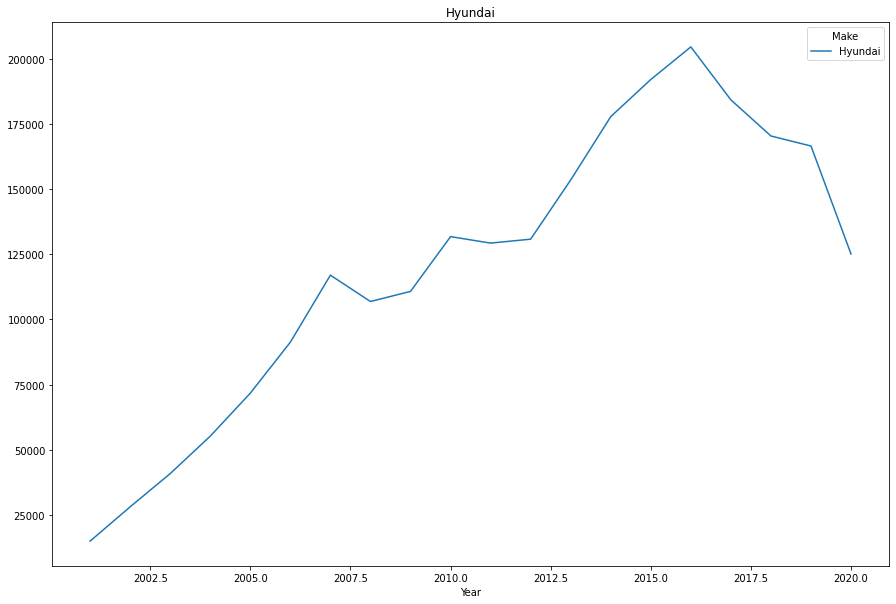

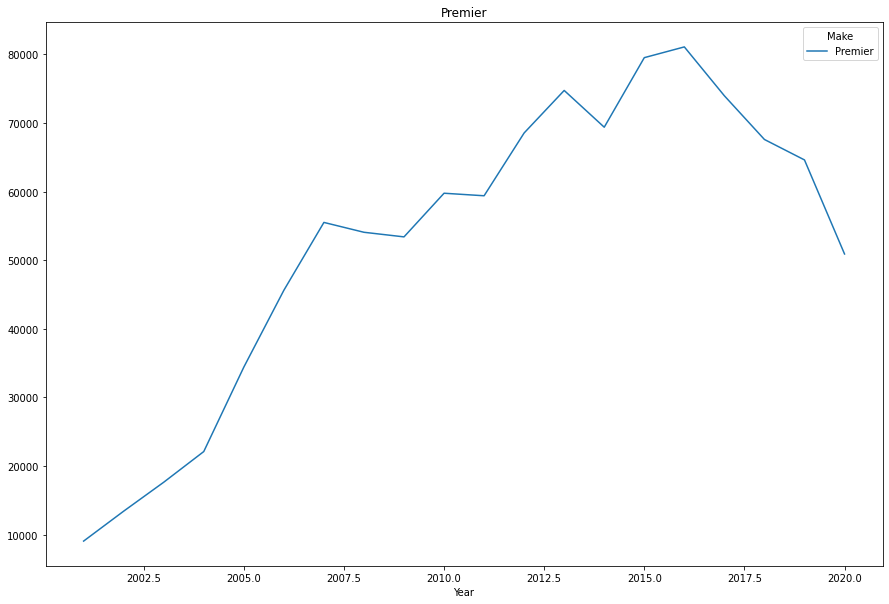

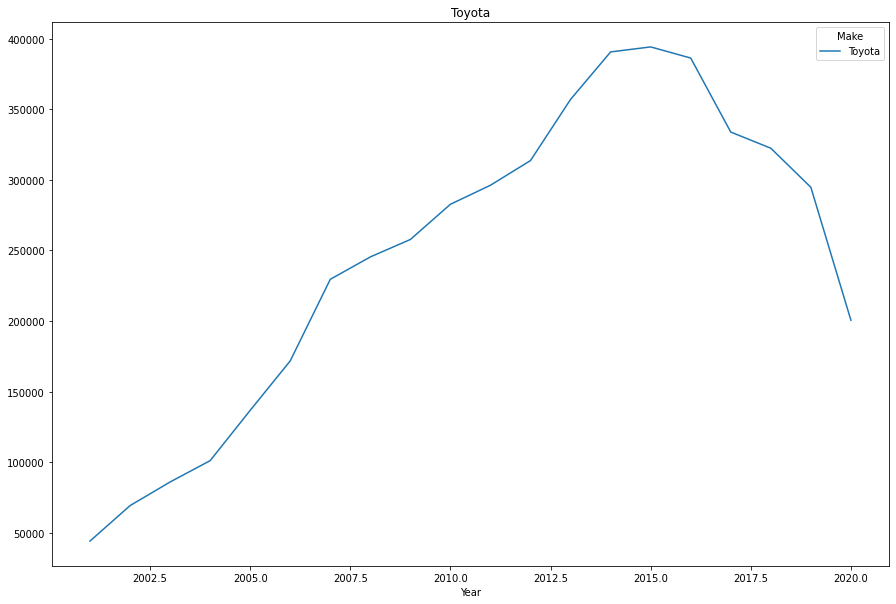

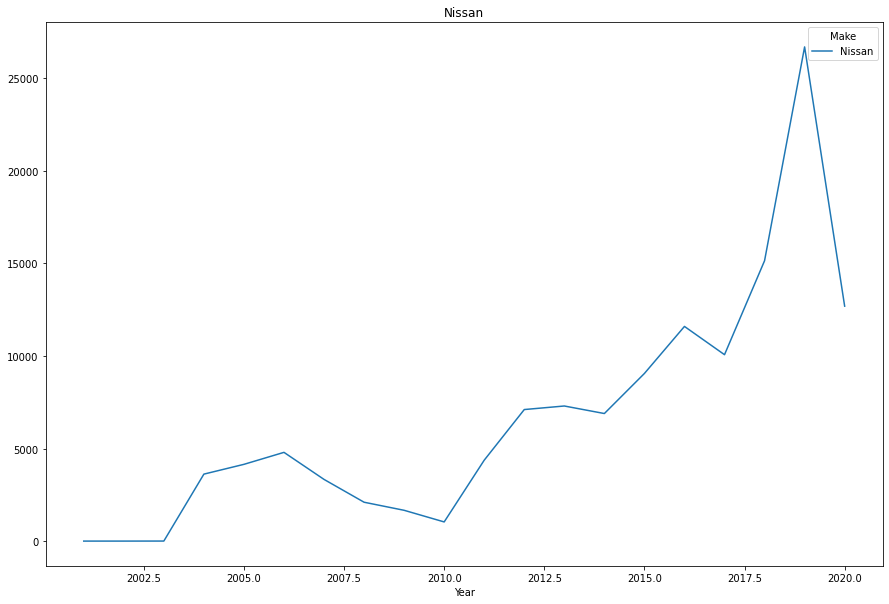

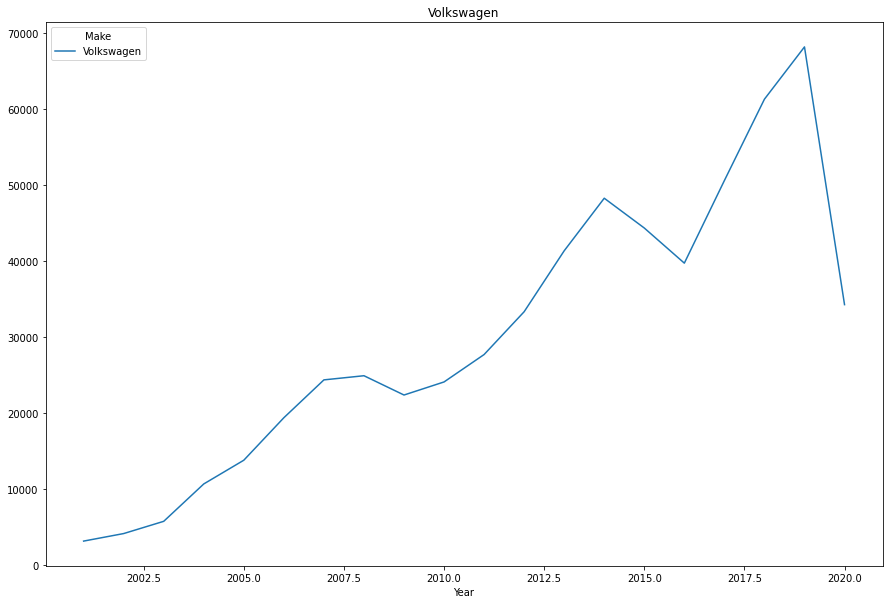

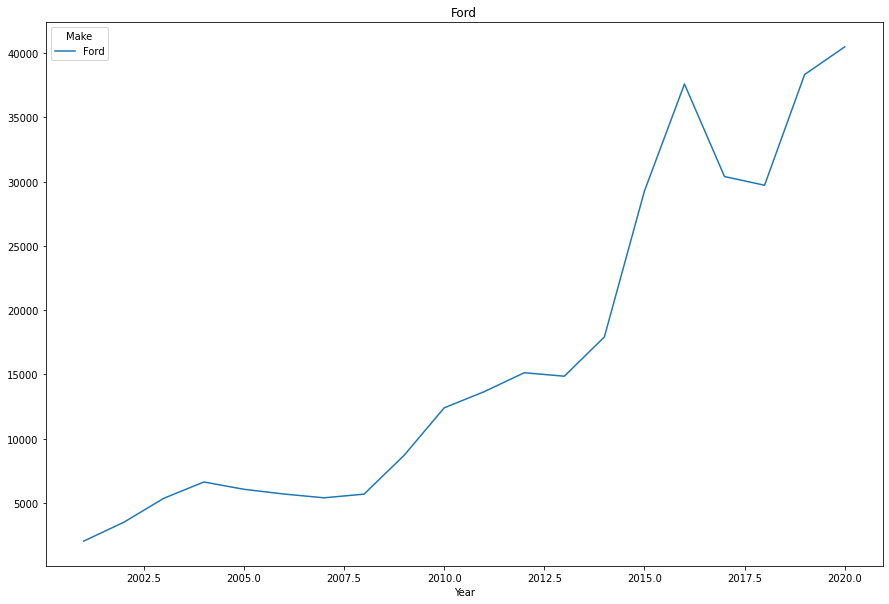

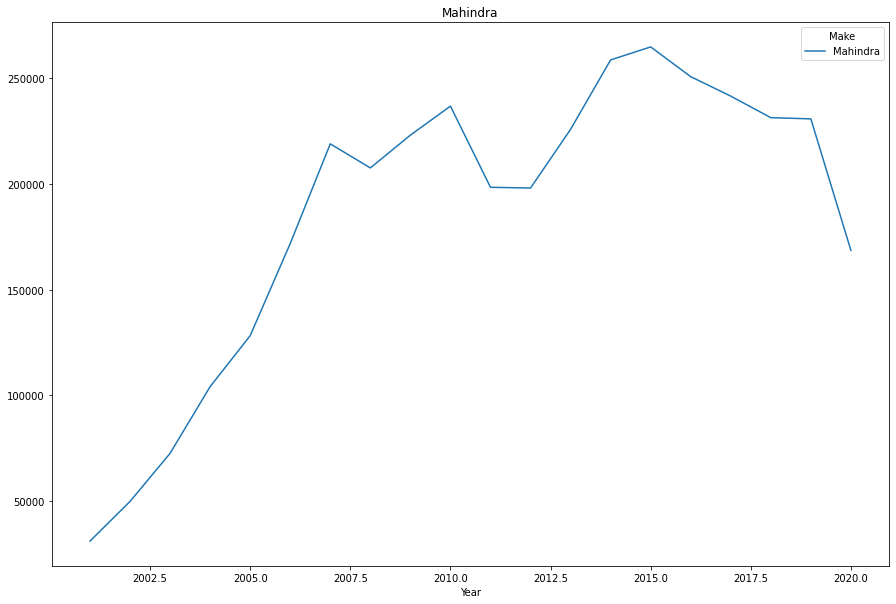

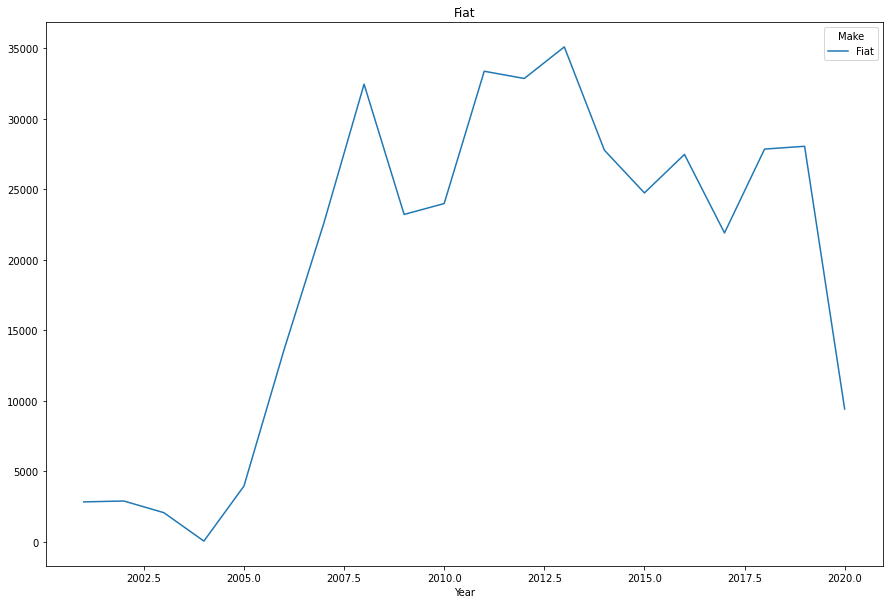

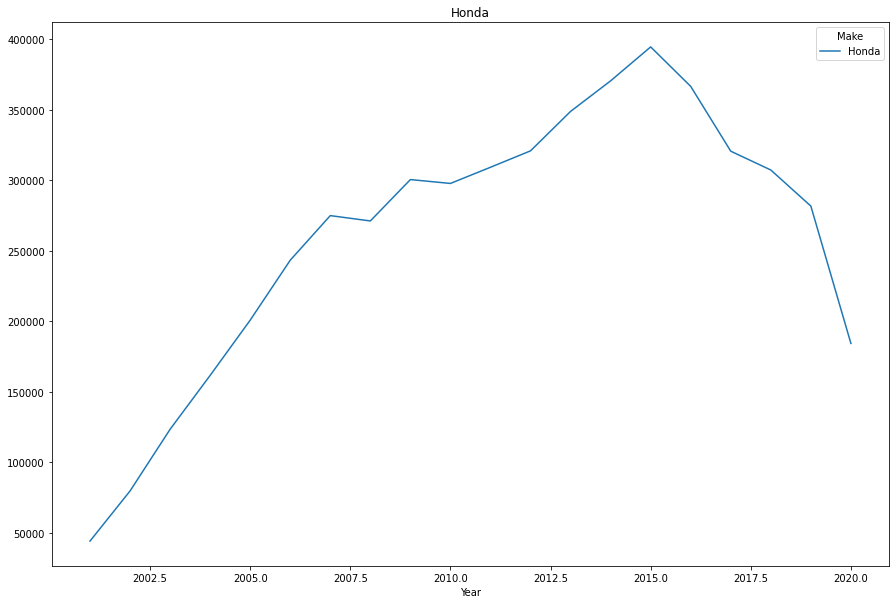

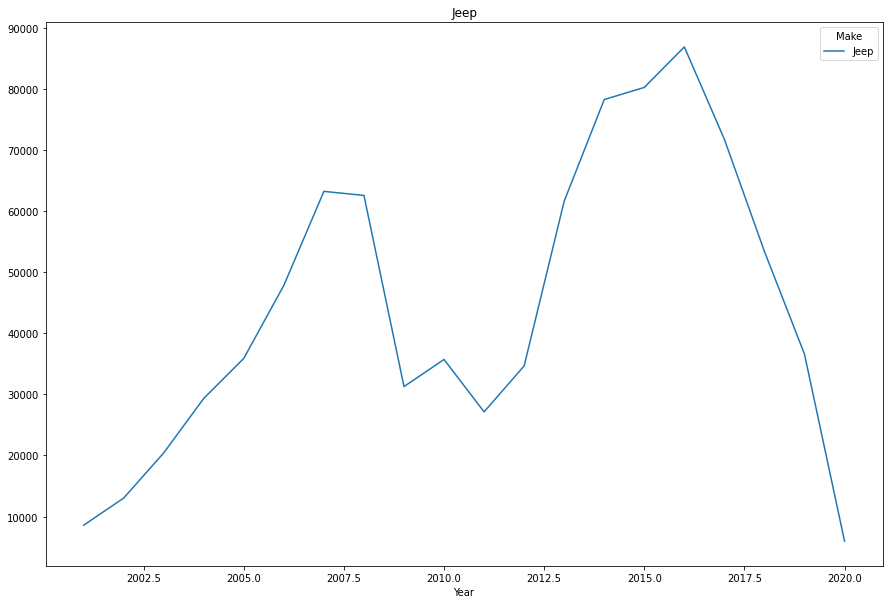

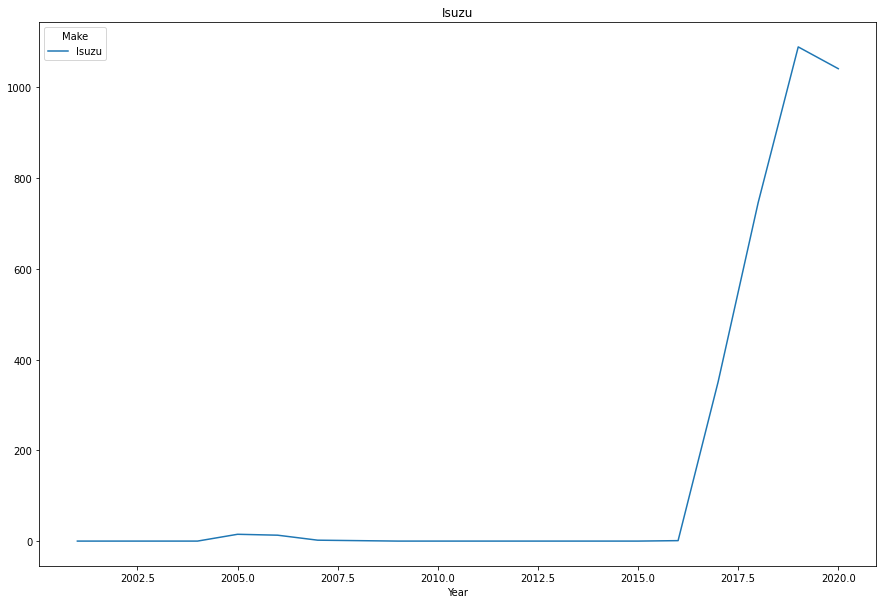

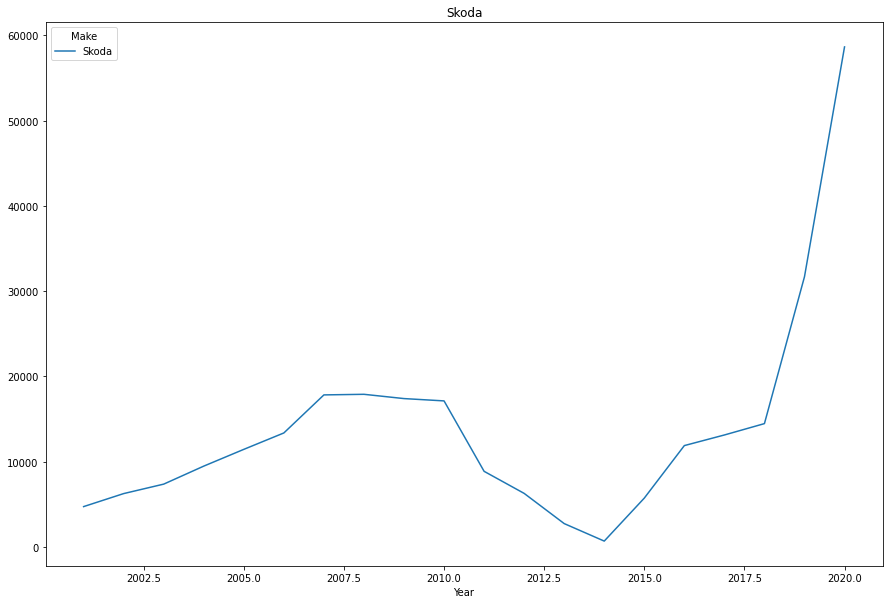

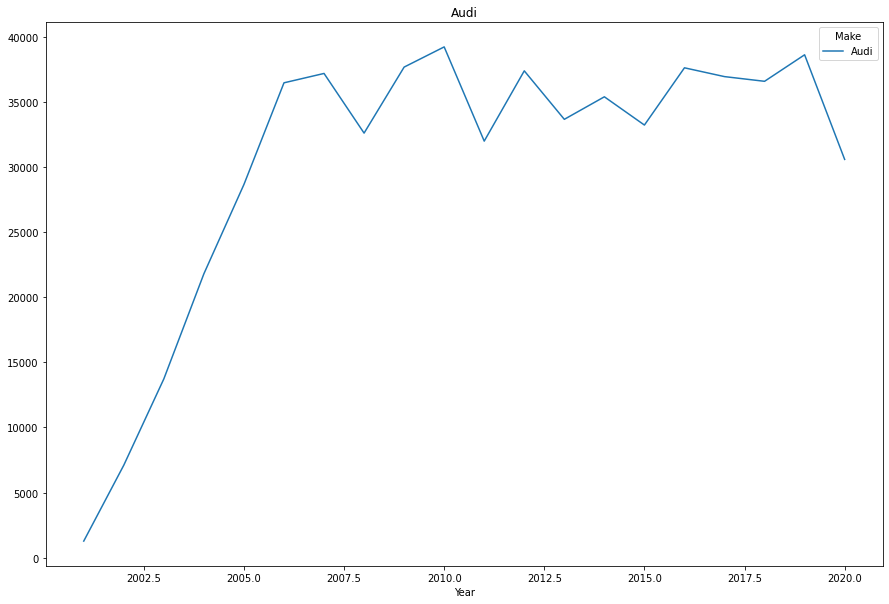

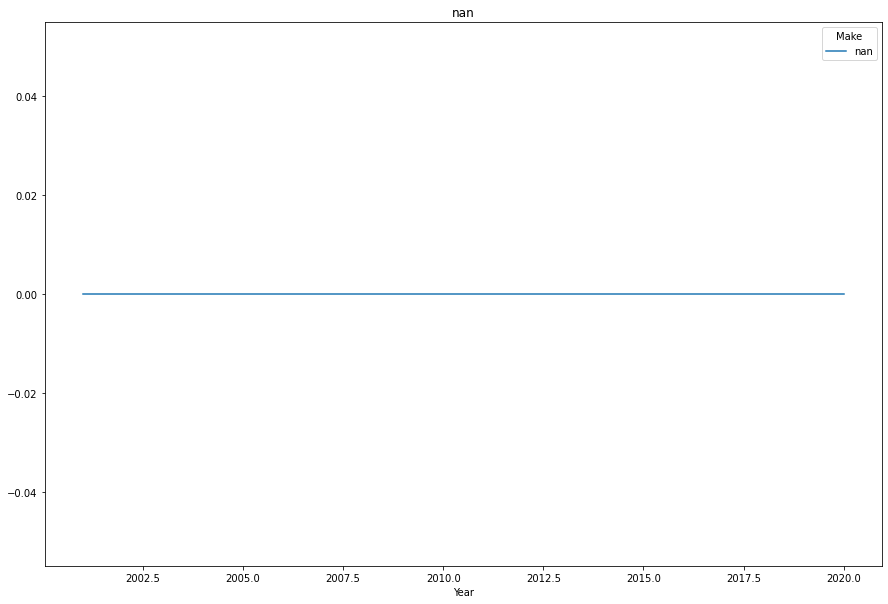

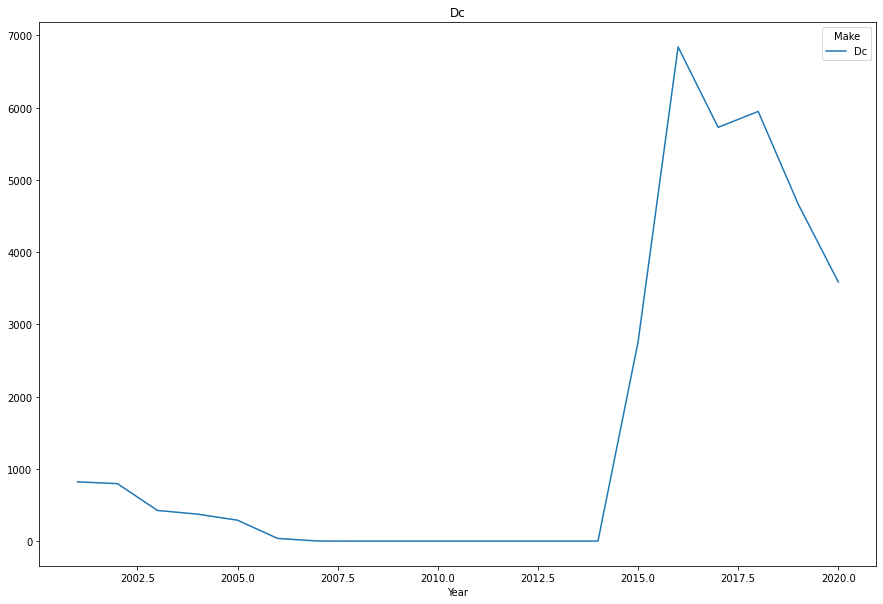

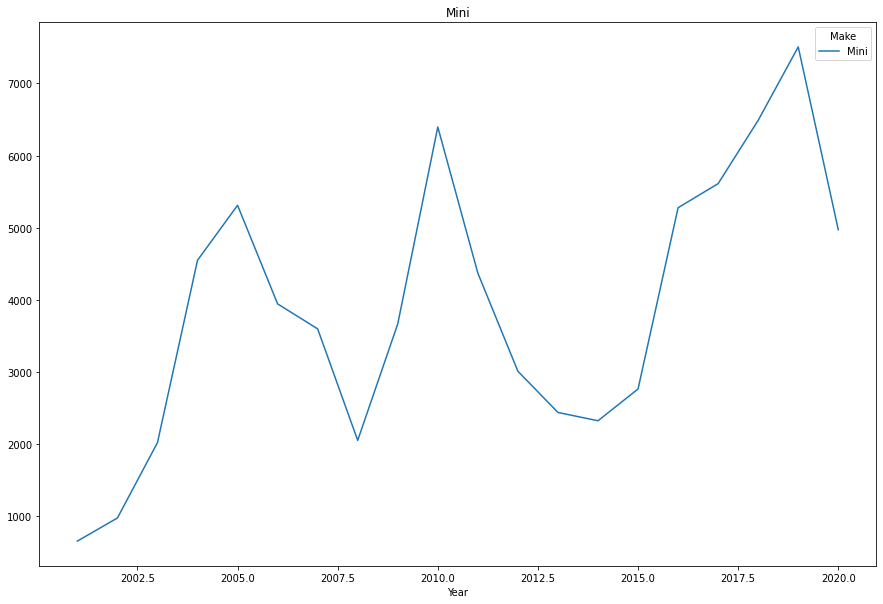

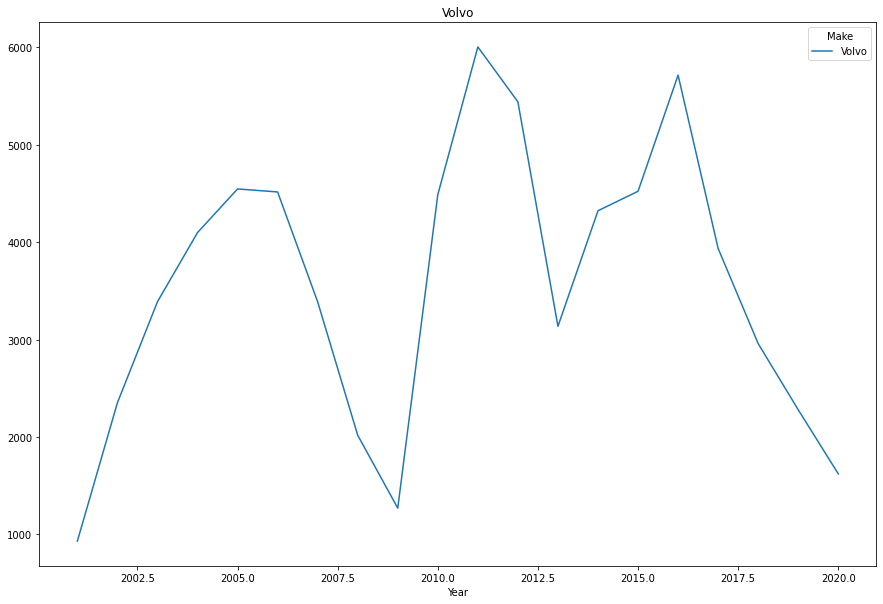

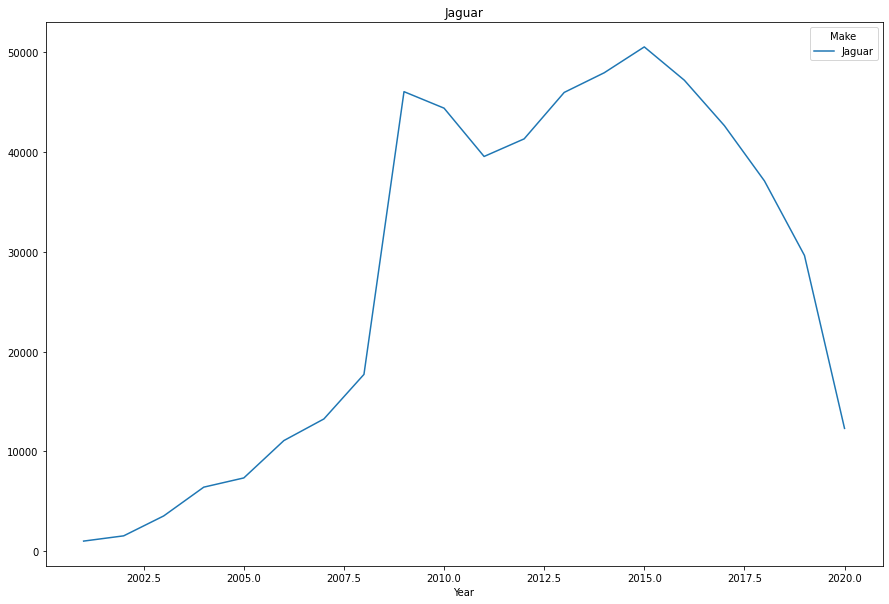

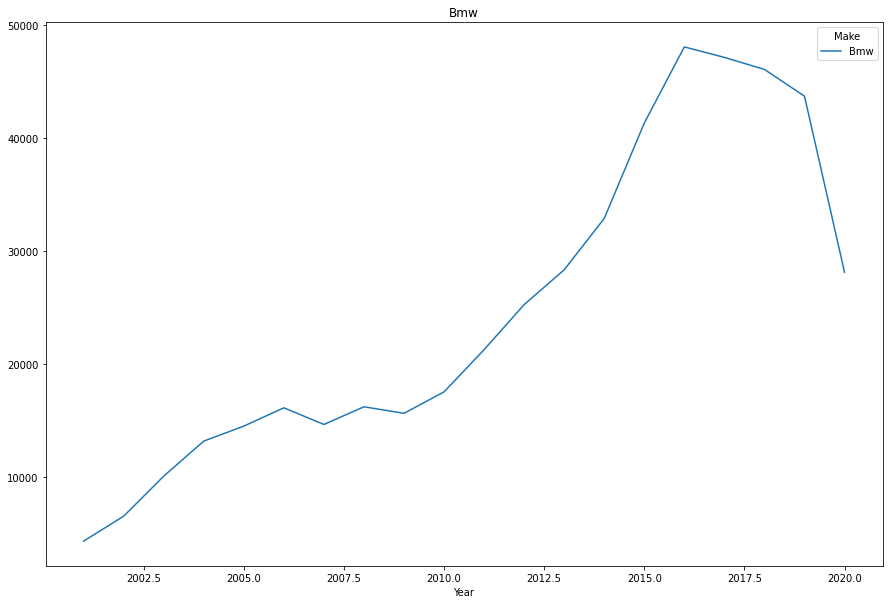

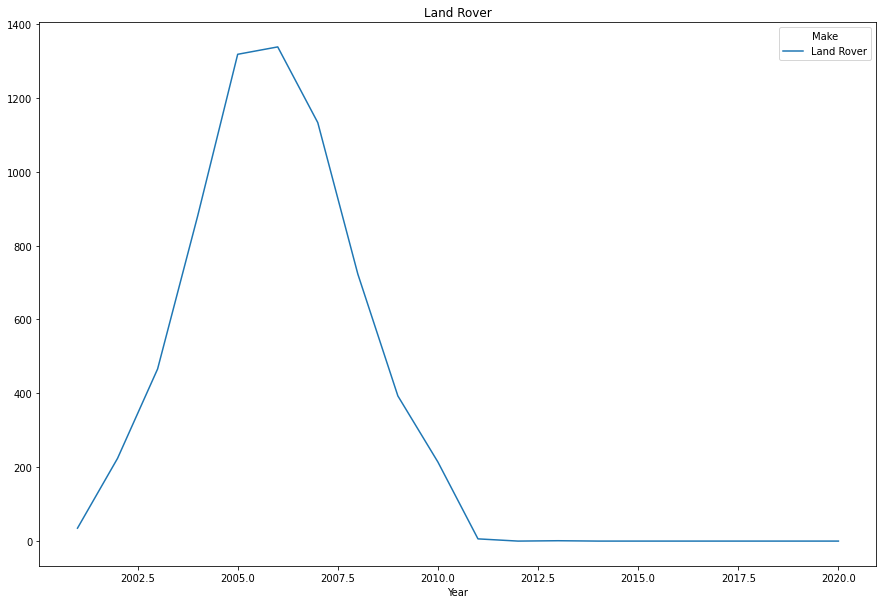

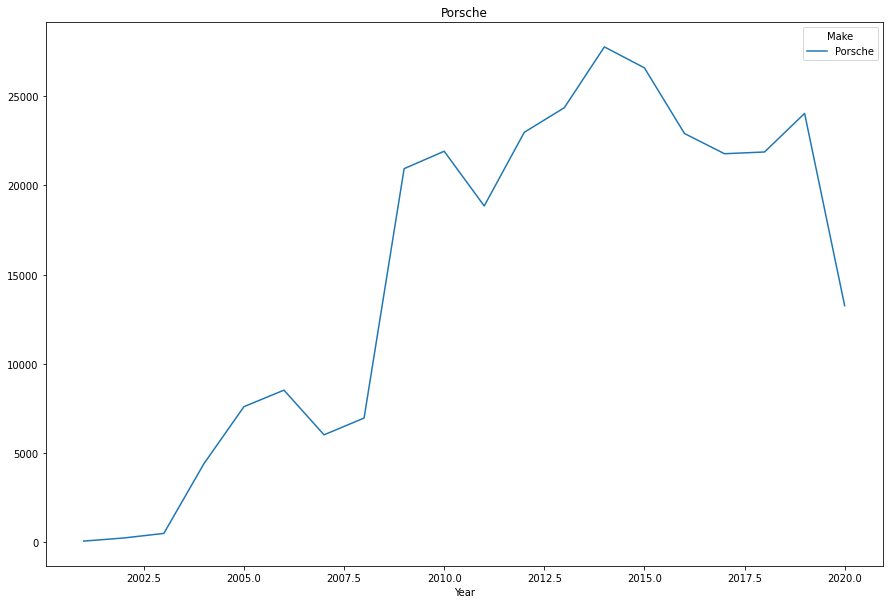

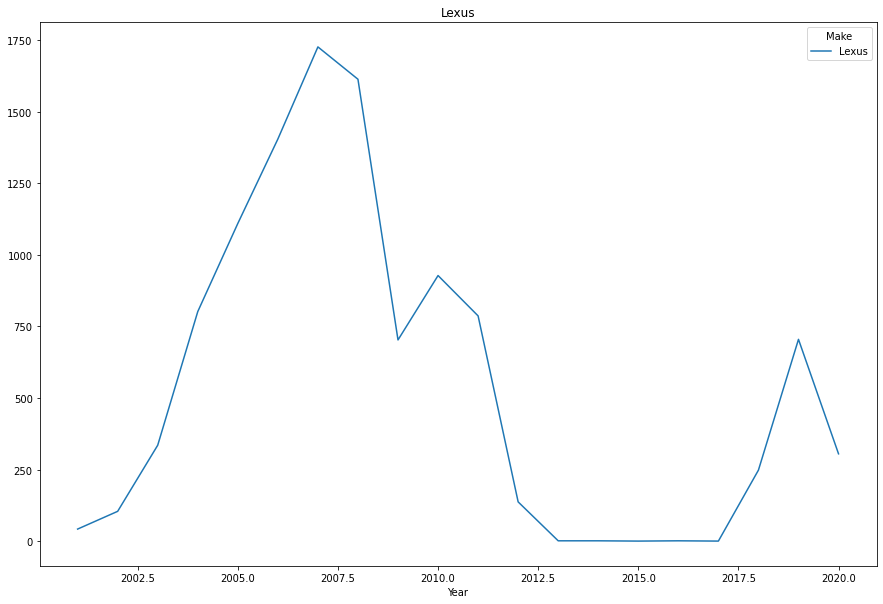

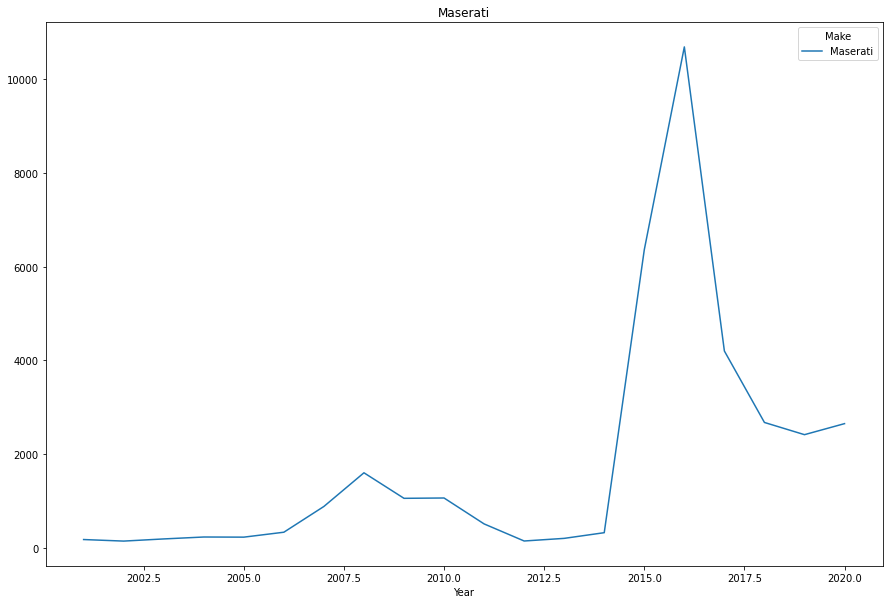

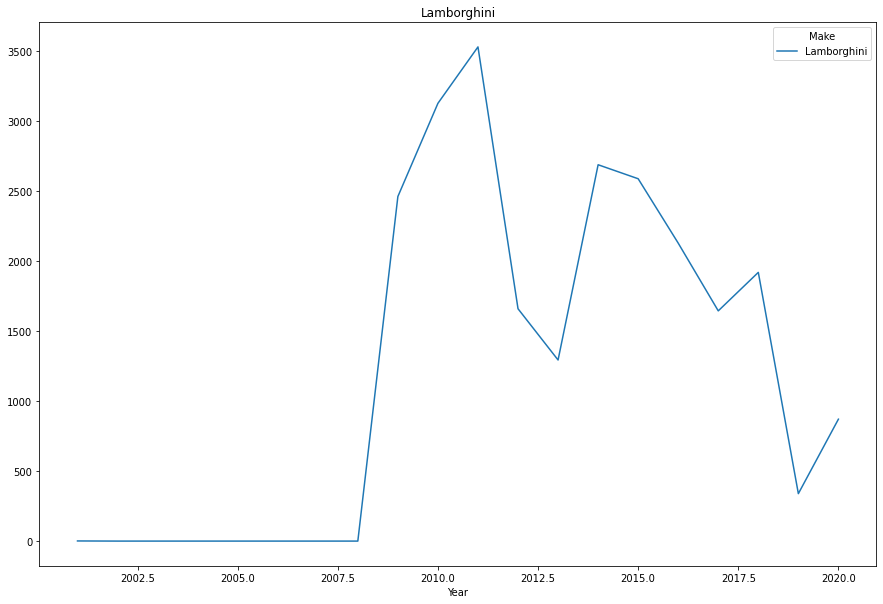

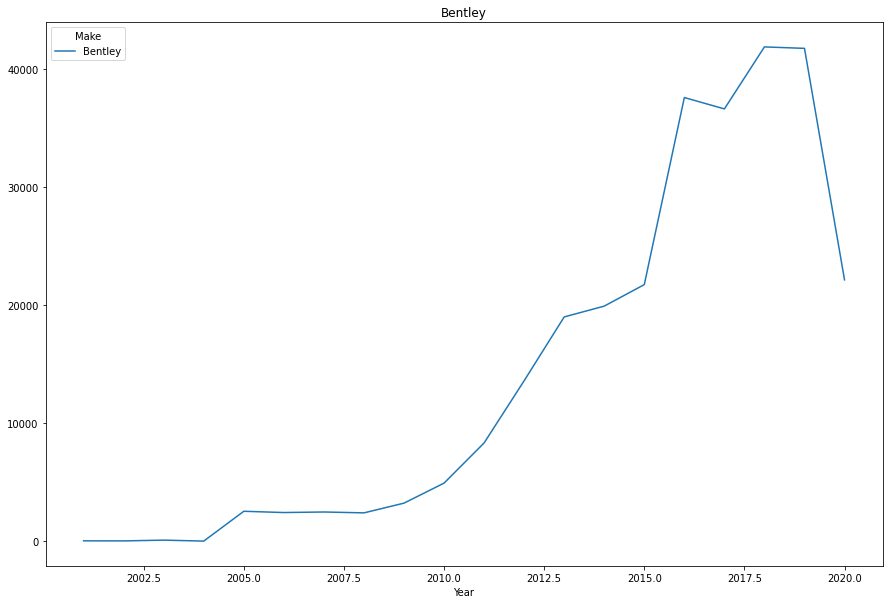

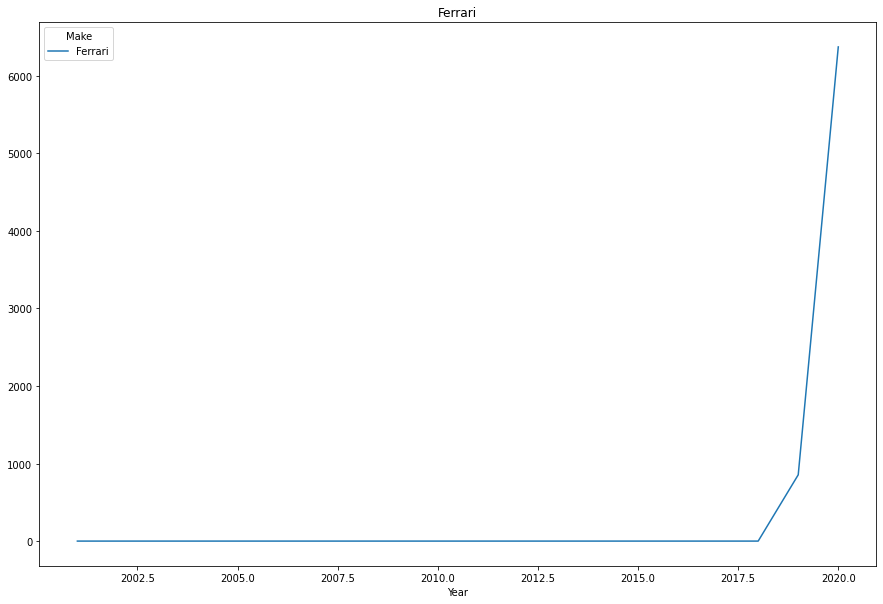

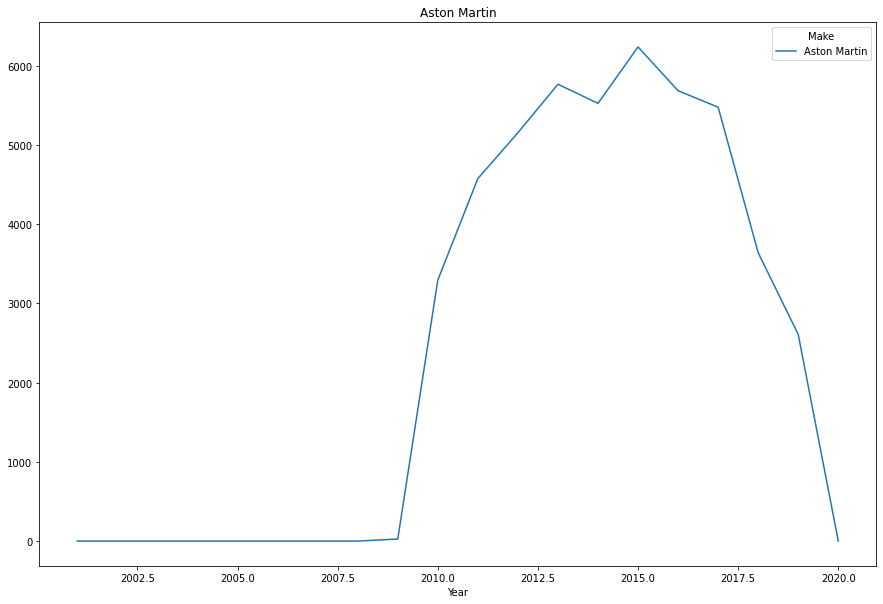

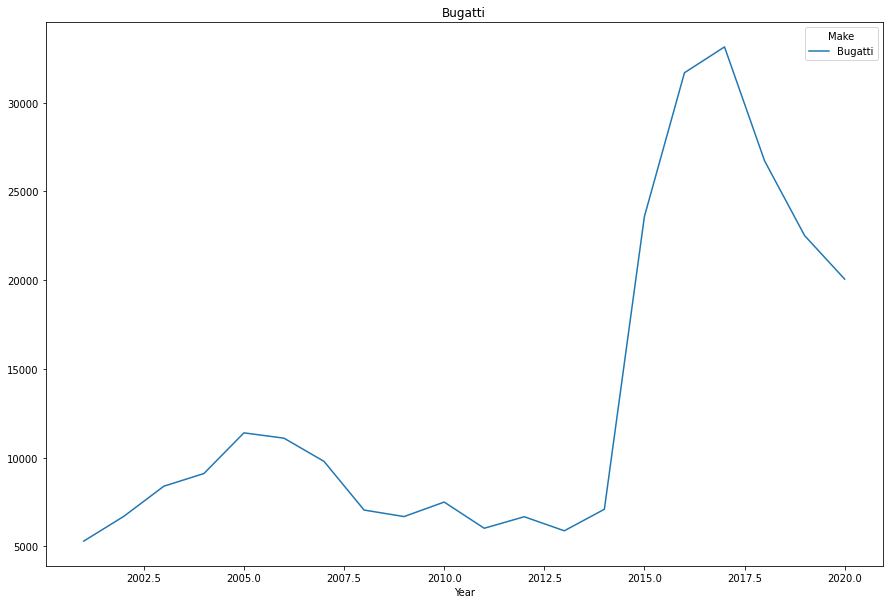

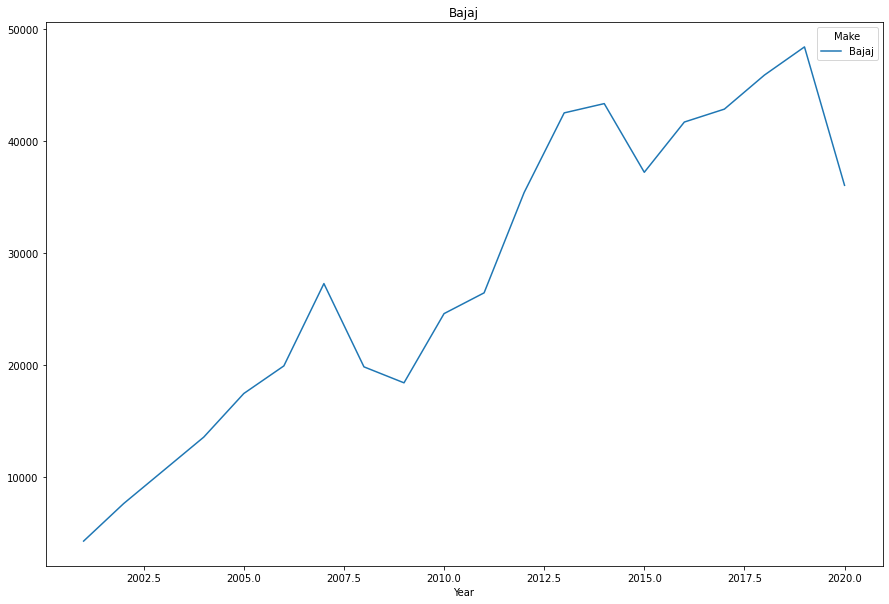

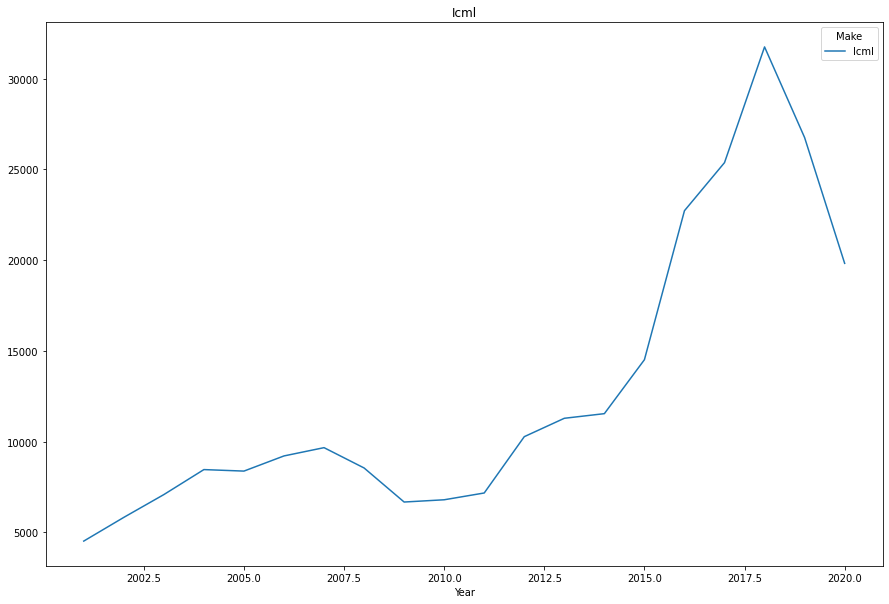

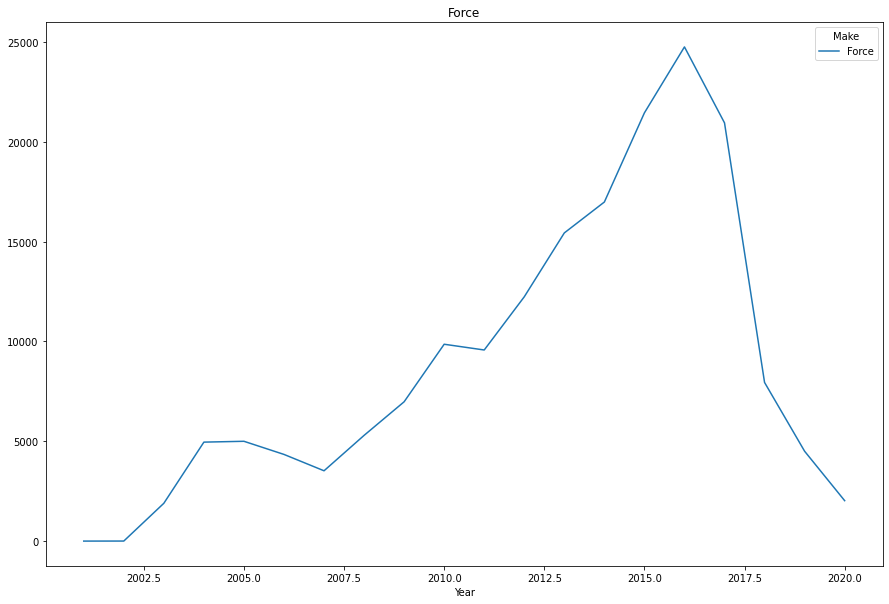

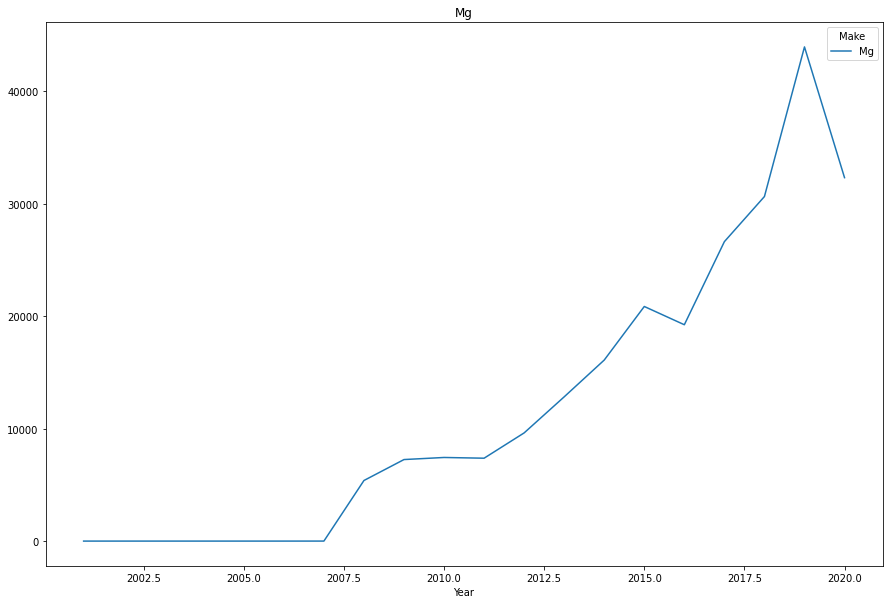

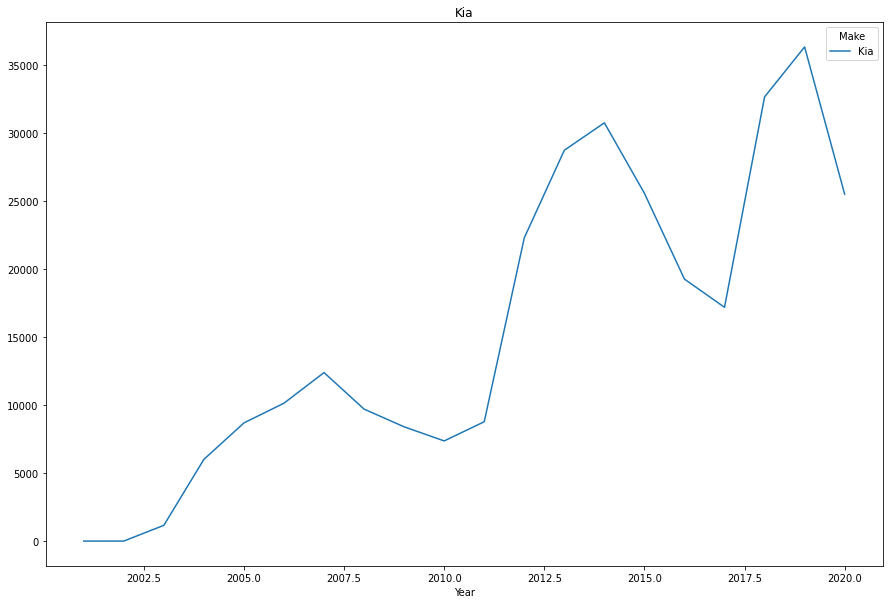

In [420]:
profit_list=[profit(df_cat.Make,i) for i in range(2001,2021)]
year=2001
for i in profit_list:    
    for j in i:
        j.append(year)
    year+=1
profit_list=np.array(profit_list).reshape(20,37,3)
profit_list= np.transpose(profit_list, (1,0,2))
for i in sales_list:
    dataset=[]
    dataset=pd.DataFrame(i)
    dataset.columns=['Make','Sales','Year']
    dataset.Year = dataset.Year.astype('int64')
    dataset.Sales = dataset.Sales.astype('float')
    dataset.groupby(['Year','Make']).sum().unstack().plot(kind='line',y='Sales',figsize=(15, 10),title=dataset.Make[0])

<AxesSubplot:xlabel='Year'>

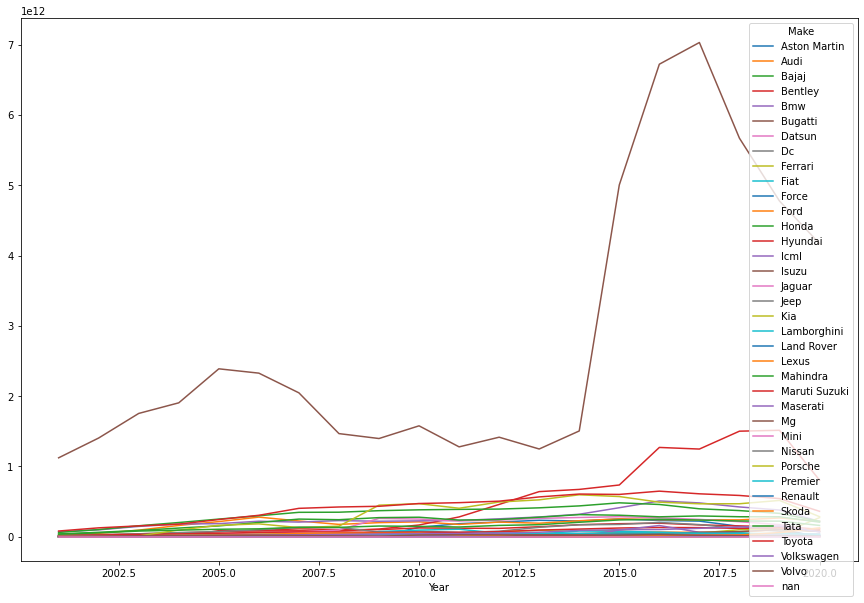

In [425]:
profit_list=profit_list.reshape(740,3)
data=pd.DataFrame(profit_list)
data.columns=['Make','Profit','Year']
data.Year = data.Year.astype('int64')
data.Profit = data.Profit.astype('float')
data.groupby(['Year','Make']).sum().unstack().plot(kind='line',y='Profit',figsize=(15, 10))

### Cumulative line chart

<AxesSubplot:xlabel='Year'>

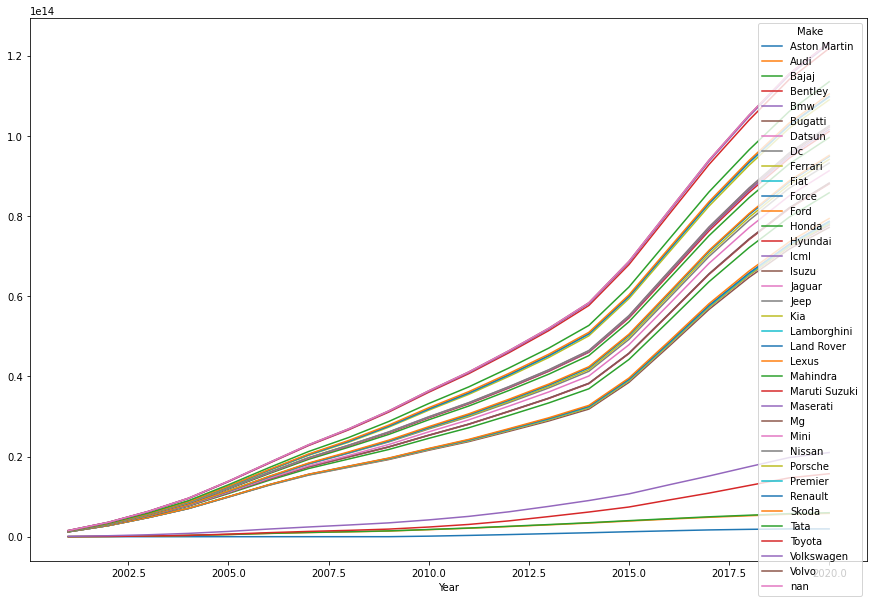

In [426]:
data.groupby(['Year','Make']).sum().groupby(level=[1]).cumsum().unstack().plot(kind='line',y='Profit', stacked = True,figsize=(15, 10))

# total profit generated

<font color="grey" size="5px"><b>overall</b></font>

In [431]:
data.Profit.sum()

123379376349242.0

<font color="grey" size="5px"><b>by each year</b></font>

In [433]:
def prof(year):
    profit=0
    for i in range(len(df[str(year)])):
        profit+=df[str(year)][i]*df['Ex-Showroom_Price'][i]
    return profit    

In [435]:
prof(2015)

10686907378076.0

<font color="grey" size="5px"><b>during selected period</b></font>

In [439]:
def prof_y(start,end):
    profit=0
    for i in range(start,end+1):
        profit+=prof(str(i))
    return profit

In [441]:
prof_y(2018,2020)

31300053829992.0

<font color="grey" size="5px"><b>growth rate</b></font>

In [444]:
def gr(start,end):
    return (abs(prof(start)-prof(end))*100)/prof(start)

In [448]:
round(gr(2018,2020),2)

27.98

# price prediction

### distribution of the values of the price column

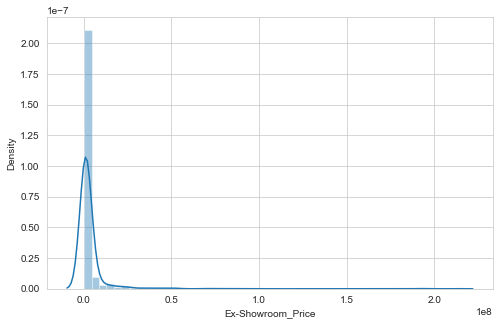

In [491]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.distplot(df['Ex-Showroom_Price'])
plt.show()

### heatmap

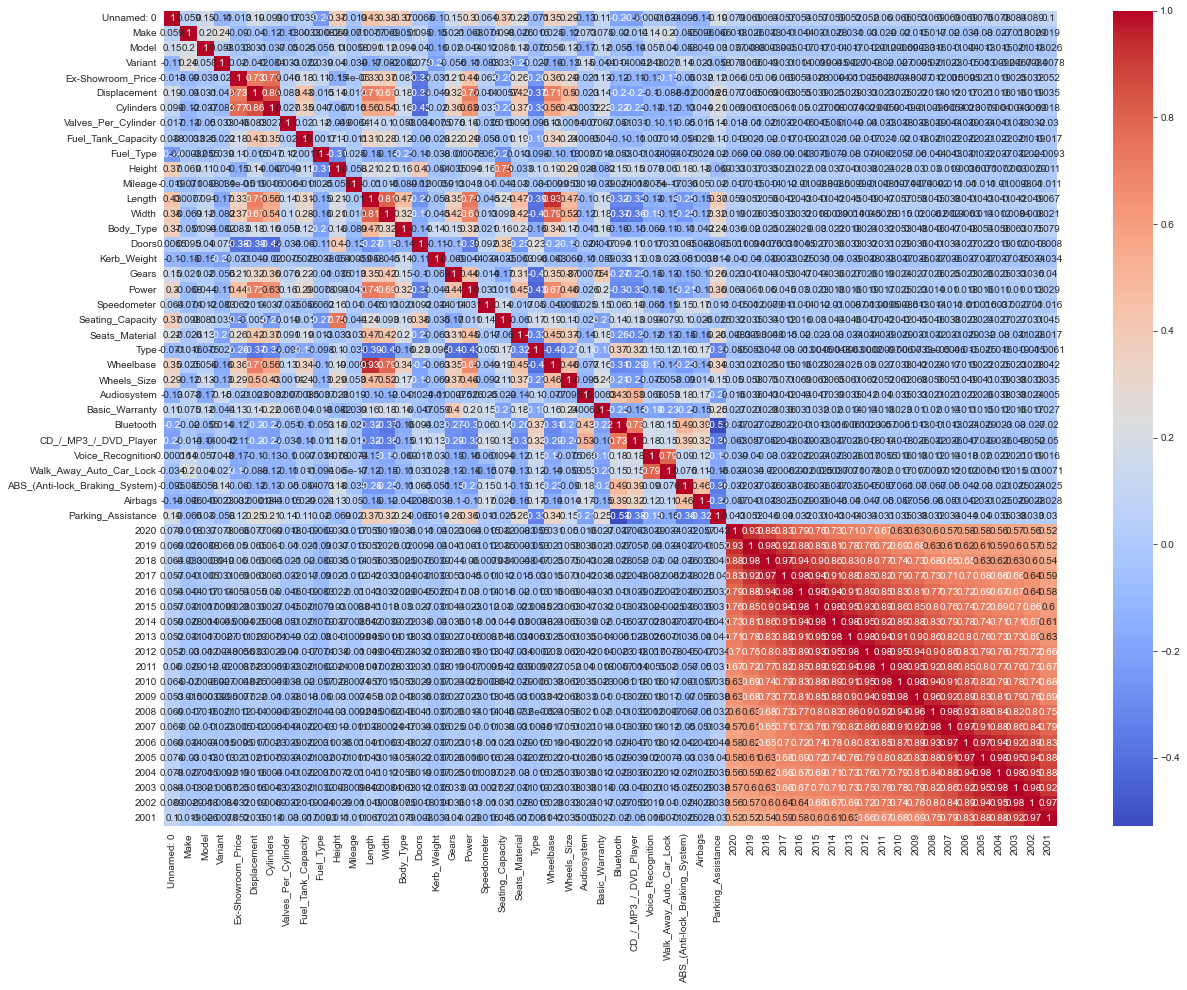

In [484]:
plt.figure(figsize=(20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

### dropping uncorrelated columns

In [533]:
df_new=copy.deepcopy(df)
thr=0.37
for col in df_new.columns:
    if abs(df_new["Ex-Showroom_Price"].corr(df_new[col]))<thr:
        df_new. drop (col, axis= 1 ,inplace= True )
df_new        

Ex-Showroom_Price  Displacement  Cylinders   Width  Doors  Power
0             292667.0         624.0        2.0  1750.0    5.0    2.0
1             236447.0         624.0        2.0  1750.0    5.0    2.0
2             296661.0         624.0        2.0  1750.0    4.0    2.0
3             334768.0         624.0        2.0  1750.0    5.0    2.0
4             272223.0         624.0        2.0  1750.0    5.0    2.0
..                 ...           ...        ...     ...    ...    ...
768          3470000.0        3198.0        5.0  1869.0    5.0   74.0
769          3233000.0        2198.0        4.0  1869.0    5.0   60.0
770          2920000.0        2198.0        4.0  1869.0    5.0   60.0
771          2990000.0        1496.0        3.0  1727.0    3.0   42.0
772          3420000.0        1998.0        4.0  1727.0    3.0   73.0

[773 rows x 6 columns]

### splitting

In [577]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('Ex-Showroom_Price',axis=1), 
                                                    df_new['Ex-Showroom_Price'],
                                                    train_size=0.7,
                                                    test_size = 0.3, 
                                                    random_state=100)

### decision tree

In [582]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(np.array(X_train),np.array(y_train).reshape(-1,1))
predictions = model.predict(np.array(X_test))

from sklearn.metrics import mean_absolute_error
model.score(np.array(X_test), predictions)

1.0

### prediction function

In [602]:
def price(displacement,cylinders,width,doors,power):
    return model.predict(np.array([displacement,cylinders,width,doors,power]).reshape(1,-1))[0]

In [613]:
price(1198.0,4.0,1569.0,3.0,343.0)

670000.0

### linear regression

In [ ]:
lm = LinearRegression()
n_features = 6
# specify number of features
rfe_n = RFE(lm, n_features)
# fit with n features
rfe_n.fit(X_train, y_train)
# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]
# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]
# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)
# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)
# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]
# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)
test_r2.append(r2_score(y_test, y_pred))
# summary
lm_n.summary()


# best time to launch a new car

### based on sales

<font color="grey" size="5px"><b>trend</b></font>

<AxesSubplot:xlabel='year'>

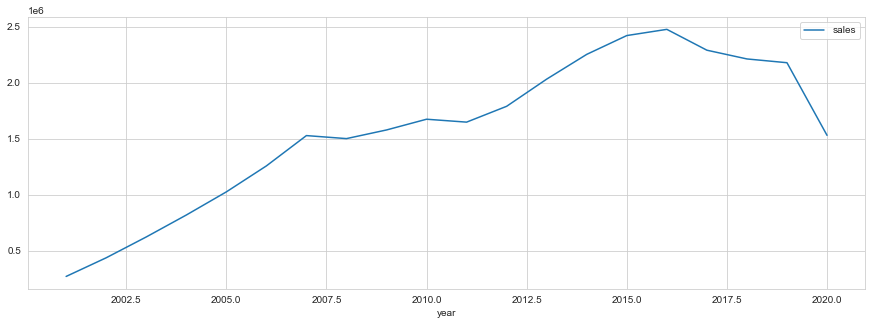

In [554]:
sales=[df.iloc[:,i].sum()for i in range(53,33,-1)]
year=[i for i in range(2001,2021)]
trend = pd.DataFrame({'year': year, 'sales': sales}, columns=['year', 'sales'])
trend.plot(kind='line',x="year",y='sales',figsize=(15, 5))

<font color="grey" size="5px"><b>time series forecasting</b></font>

In [616]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(trend['sales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)           
  

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=239.871, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=235.319, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=255.625, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=234.632, Time=0.07 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=236.576, Time=0.14 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=237.199, Time=0.15 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=nan, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=242.589, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,1,0)[12] intercept
Total fit time: 1.871 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   20
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                -114.316
Date:                             Tue, 24 May 2022   AIC                            234.632
Time:                                     02:27:41   BIC                            234.871
Sample:                                          0   HQIC                           233.025
                                              - 20                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.737e+05   3.91e+05      2.490      0.013    2.07e+05    1.74e+06
ma.L1          0.9708      0.857      1.133      0.257      -0.708       2.650
sigma2      1.952e+11      0.026   7.56e+12      0.000    1.95e+11    1.95e+11
===================================================================================
Ljung-Box (L1) (Q):                   3.34   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.07   Prob(JB):                         0.68
Heteroskedasticity (H):               1.00   Skew:                            -0.61
Prob(H) (two-sided):                  1.00   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.41e+30. Standard errors may be unstable.
"""

<font color="crimson" size="5px"> <b>best model:ARIMA</b> </font>
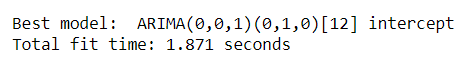

In [624]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(trend,train_size=0.7,test_size = 0.3,random_state=14)
  
warnings.filterwarnings('ignore')
    
# Fit an ARIMA(0, 0, 1)(0,1,0)[12] on the training set
from statsmodels.tsa.arima.model import ARIMA
  
model = ARIMA(train['sales'],order=(0,0,1), seasonal_order=(0,1,0,12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             sales   No. Observations:                   14
Model:             ARIMA(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                 -28.946
Date:                           Tue, 24 May 2022   AIC                             61.892
Time:                                   02:46:56   BIC                             59.278
Sample:                                        0   HQIC                            56.426
                                            - 14                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9557      1.053      0.907      0.364      -1.109       3.020
sigma2      4.902e+11   1.78e-13   2.76e+24      0.000     4.9e+11     4.9e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.16   Prob(JB):                         0.85
Heteroskedasticity (H):                nan   Skew:                            -0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         1.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

<AxesSubplot:>

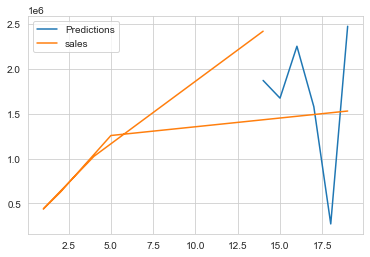

In [625]:
start = len(train)
end = len(train) + len(test) - 1
  
predictions = result.predict(start, end,typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['sales'].plot(legend = True)

In [626]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
print(rmse(test["sales"], predictions))
  
# Calculate mean squared error
mean_squared_error(test["sales"], predictions)

896952.3139373409


804523453477.5502

<AxesSubplot:>

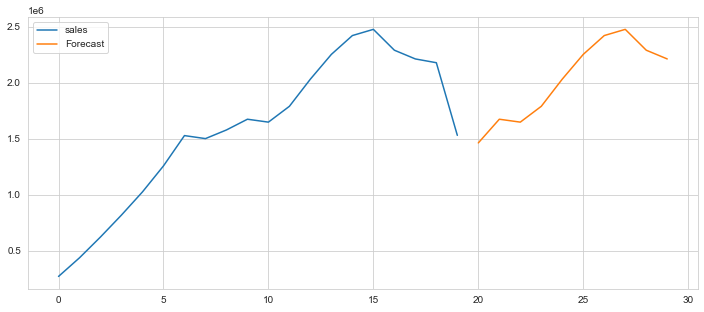

In [632]:
# Train the model on the full dataset
model = model = ARIMA(trend['sales'],order=(0,0,1), seasonal_order=(0,1,0,12))
result = model.fit()
  
# Forecast for the next 10 years
forecast = result.predict(start = len(trend), 
                          end = (len(trend)-1) + 10, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
trend['sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [648]:
forecast

20    1.462436e+06
21    1.674012e+06
22    1.648030e+06
23    1.789436e+06
24    2.032197e+06
25    2.253307e+06
26    2.421219e+06
27    2.476613e+06
28    2.290444e+06
29    2.212385e+06
Name: Forecast, dtype: float64

In [647]:
forecast.max()

2476613.0

In [650]:
2020+list(forecast).index(forecast.max())

2027

<font color="chocolate" size="5px"><b>Best time to launch a new car according to sales data is in <font color="black">2027</font></b></font>

### based on profit

In [ ]:
def prof(year):
    profit=0
    for i in range(len(df[str(year)])):
        profit+=df[str(year)][i]*df['Ex-Showroom_Price'][i]
    return profit    

<AxesSubplot:xlabel='year'>

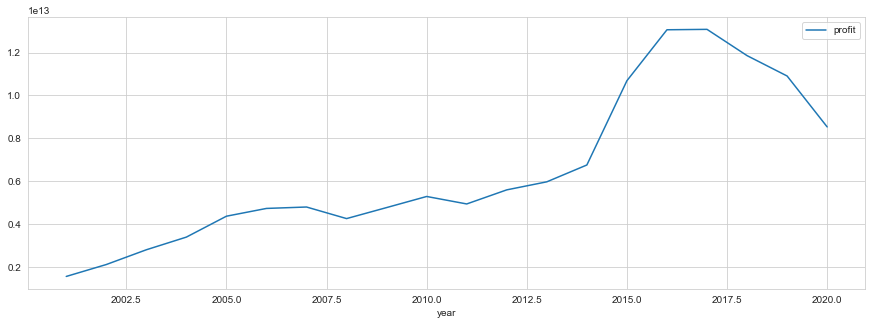

In [663]:
pft=[]
for i in range(2001,2021):
    pft.append(prof(i))
year=[i for i in range(2001,2021)]
trend = pd.DataFrame({'year': year, 'profit': pft}, columns=['year', 'profit'])
trend.plot(kind='line',x="year",y='profit',figsize=(15, 5))

<font color="grey" size="5px"><b>time series forecasting</b></font>

In [664]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(trend['profit'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)           
  

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=479.357, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=479.473, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=477.756, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=502.299, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=476.206, Time=0.11 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=478.203, Time=0.11 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=479.532, Time=0.18 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=nan, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=478.046, Time=0.04 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=494.694, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,1,0)[12] intercept
Total fit time: 1.594 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   20
Model:             SARIMAX(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                -235.103
Date:                             Tue, 24 May 2022   AIC                            476.206
Time:                                     03:12:16   BIC                            476.444
Sample:                                          0   HQIC                           474.598
                                              - 20                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.852e+12   3.29e-13   2.08e+25      0.000    6.85e+12    6.85e+12
ma.L1          0.9481      1.156      0.820      0.412      -1.317       3.213
sigma2       3.09e+24   2.32e-25   1.33e+49      0.000    3.09e+24    3.09e+24
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.23   Prob(JB):                         0.82
Heteroskedasticity (H):               0.67   Skew:                            -0.12
Prob(H) (two-sided):                  0.75   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.41e+65. Standard errors may be unstable.
"""

<font color="crimson" size="5px"> <b>best model:ARIMA</b> </font>
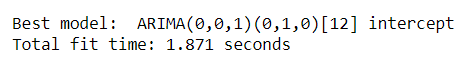

In [665]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(trend,train_size=0.7,test_size = 0.3,random_state=14)
  
warnings.filterwarnings('ignore')
    
# Fit an ARIMA(0, 0, 1)(0,1,0)[12] on the training set
from statsmodels.tsa.arima.model import ARIMA
  
model = ARIMA(train['profit'],order=(0,0,1), seasonal_order=(0,1,0,12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            profit   No. Observations:                   14
Model:             ARIMA(0, 0, 1)x(0, 1, [], 12)   Log Likelihood                 -61.645
Date:                           Tue, 24 May 2022   AIC                            127.290
Time:                                   03:12:32   BIC                            124.676
Sample:                                        0   HQIC                           121.824
                                            - 14                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2993      0.256     -1.170      0.242      -0.801       0.202
sigma2       1.68e+25   1.37e-27   1.22e+52      0.000    1.68e+25    1.68e+25
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.16   Prob(JB):                         0.85
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         1.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

<AxesSubplot:>

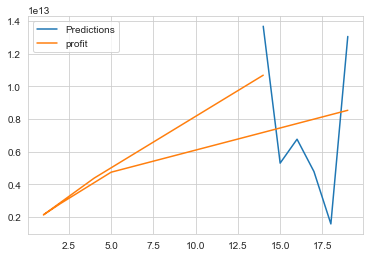

In [666]:
start = len(train)
end = len(train) + len(test) - 1
  
predictions = result.predict(start, end,typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['profit'].plot(legend = True)

In [667]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
print(rmse(test["profit"], predictions))
  
# Calculate mean squared error
mean_squared_error(test["profit"], predictions)

3236960585275.3545


1.0477913830626164e+25

<AxesSubplot:>

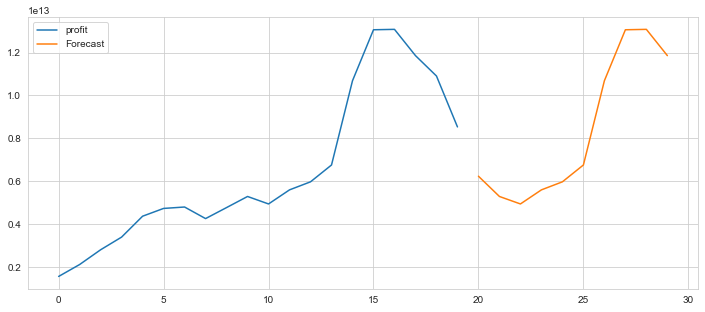

In [668]:
# Train the model on the full dataset
model = model = ARIMA(trend['profit'],order=(0,0,1), seasonal_order=(0,1,0,12))
result = model.fit()
  
# Forecast for the next 10 years
forecast = result.predict(start = len(trend), 
                          end = (len(trend)-1) + 10, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
trend['profit'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [669]:
forecast

20    6.243261e+12
21    5.300650e+12
22    4.952692e+12
23    5.608580e+12
24    5.982516e+12
25    6.766114e+12
26    1.068691e+13
27    1.305826e+13
28    1.307755e+13
29    1.185515e+13
Name: Forecast, dtype: float64

In [670]:
forecast.max()

13077551214648.0

In [671]:
2020+list(forecast).index(forecast.max())

2028

<font color="chocolate" size="5px"><b>Best time to launch a new car according to proft data is in <font color="black">2028</font></b></font>